# <u>EDA on the KSA Used car market</u>

## NOT UPDATED TO KSA DATA

Dataset used from the 'big_cars' dataset:

Original shape:
- Rows: 188,533
- Columns: 14

Cleaned shape:
- Rows: 160,970 
- Columns: 16

### <u>**Cleaning Summary**:</u>

##### **Consistency**:
Found major issues with consistency in columns ['brand', 'model', 'engine', 'transimission', 'ext_col', 'int_col']

- Created new columns using the 'engine' column: ['horsepower', 'liters', 'cylinders'].
- Split the 'model' column into 2 columns: ['model', 'trim'] - *(trim is the category like base model or premium)*.
- Fixed 'brand' column inconsistency.

##### **Completeness**:
Found missing values, especially after creating the above columns:

- horsepower column: had a lot of nulls, dealt with it by outsourcing the factual horsepower values based off of the engine specs already in the data as best I can.
- liters and cylinders columns: filled the electric cars with 0, dropped the rest of the Gasoline cars.
- handled a few nulls were in the form of symbols.

##### **Uniqueness**
No duplicates were found.

##### **Outliers**
Outliers removed from following columns using IQR:

- year: anything older than 2003
- price: prices over 150,000
- mileage: around more than 250,000 mileage
- horsepower: 0 horsepower or higher than 600

### <u>**Summary of findings from the below**:</u>
##### **Univariate Analysis Conclusion**

*Ordered by graph*

1. The cars offered in the USA used car market seem to be fairly new, with most of the cars are from the past 5 years.
2. Most offered cars have not been driven over 150,000 mileage, which could mean there's a pattern for purchase behavior as people tend to sell their cars and buy a new one when they have driven it for 150,000 miles.
3. 50% of the horsepower spec falls between 200 and 600, with 25% of that being about 300.
4. The engine liters seem to be split into 2 ranges, 2.0 to 4.0, and 4.0 to 6.0.
5. Cars with engine that have 6 cylinders seem to be what is mostly offered, with 8 cylinders trailing behind it, which could also explain the engine liters distribution.
6. Most cars seem to be below the price of 100,000, with the median being around 21,000.
7. The most sold brands of used cars in the USA market are Ford, Mercedes, Chevrolet, BMW, Audi, Porsche, Toyota, Lexus, Land Rover, and Jeep. This could indicate the popular choices too.
8. And the top 5 colors seem to be the standard colors, Black, White, Gray, Silver, and Blue.
9. The popular Transmission type is the Automatic, leading with about 90% of all cars.
10. The prefered Fuel Type in the US is the Gasoline, with over 140,000 cars in the dataset favoring that observation.

##### **Correlation Analysis**
Seems as though there are good correlations between Price and the Model Year, Mileage, and Horsepower/Engine, and a negative correlation with Damages, which is exactly what we need.

Features that MUST be used in the Machine Learning training:

1. Year.
2. Mileage.
3. Features of Engine specs, horsepower or liters or cylinders, or maybe combine the 3 somehow to have a representation of the Engine as a whole (Horsepower is a pretty good representation of the average person car knowledge).
4. Idealy, Brand and Model should be also included as categorical features.

In [241]:
import pandas as pd
import numpy as np

# To handle column strings cleaning
import re
import json

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Used Machine learning for visuals
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [242]:
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 10_000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed
    # display.float_format = lambda x: '{:,.2f}'.format(x)  # set as needed

set_pandas_display_options()


In [243]:
df = pd.read_csv('ksa_car_dataset.csv')

In [244]:
df.head()

,Car_IDs,Car_Brands,Car_Models,Car_Years,Car_Prices,Car_Kilometers,Car_Fuel_Types,Car_Gear_Types,Car_Engine_Sizes,Car_Drivetrains,Car_Conditions,Car_Extensions,Car_Exterior_Colors,Car_Interior_Colors,Car_Seat_Numbers,Car_Origins,Car_Links
0,149341,Brand:Mercedes,E,2016,"76,800SAR",167611 KM,Diesel,Automatic,2.2,RWD,used,220 d,White,Black,5.0,Saudi,https://syarah.com/en/cardetail/mercedes-e-used-149341#page_number=1&product_position=1&listing_type=filter
1,197716,Brand:Ford,F350,2019,"78,400SAR",53941 KM,Gasoline,Automatic,6.2,Double (4x4),used,XL,White,Beige,5.0,Saudi,https://syarah.com/en/cardetail/ford-f350-used-197716#page_number=1&product_position=2&listing_type=filter
2,169575,Brand:MG,ZS,2020,"42,500",82991 KM,Gasoline,Automatic,1.5,FWD,used,STD,Black,Grey,5.0,Saudi,https://syarah.com/en/cardetail/mg-zs-used-169575#page_number=1&product_position=3&listing_type=filter
3,177219,Brand:FAW,Bestune T77,2021,"47,500",68431 KM,Gasoline,Automatic,1.2,FWD,used,NaN,Yellow,Red,5.0,Saudi,https://syarah.com/en/cardetail/faw-bestune-t77-used-177219#page_number=1&product_position=4&listing_type=filter
4,192049,Brand:Nissan,Sentra,2020,"35,000",177421 KM,Gasoline,CVT,1.6,FWD,used,S,leaden,Beige,5.0,Saudi,https://syarah.com/en/cardetail/nissan-sentra-used-192049#page_number=1&product_position=5&listing_type=filter


In [245]:
df.drop(columns='Car_Links', inplace=True)

In [246]:
df.head()

,Car_IDs,Car_Brands,Car_Models,Car_Years,Car_Prices,Car_Kilometers,Car_Fuel_Types,Car_Gear_Types,Car_Engine_Sizes,Car_Drivetrains,Car_Conditions,Car_Extensions,Car_Exterior_Colors,Car_Interior_Colors,Car_Seat_Numbers,Car_Origins
0,149341,Brand:Mercedes,E,2016,"76,800SAR",167611 KM,Diesel,Automatic,2.2,RWD,used,220 d,White,Black,5.0,Saudi
1,197716,Brand:Ford,F350,2019,"78,400SAR",53941 KM,Gasoline,Automatic,6.2,Double (4x4),used,XL,White,Beige,5.0,Saudi
2,169575,Brand:MG,ZS,2020,"42,500",82991 KM,Gasoline,Automatic,1.5,FWD,used,STD,Black,Grey,5.0,Saudi
3,177219,Brand:FAW,Bestune T77,2021,"47,500",68431 KM,Gasoline,Automatic,1.2,FWD,used,NaN,Yellow,Red,5.0,Saudi
4,192049,Brand:Nissan,Sentra,2020,"35,000",177421 KM,Gasoline,CVT,1.6,FWD,used,S,leaden,Beige,5.0,Saudi


In [247]:
df.tail()

,Car_IDs,Car_Brands,Car_Models,Car_Years,Car_Prices,Car_Kilometers,Car_Fuel_Types,Car_Gear_Types,Car_Engine_Sizes,Car_Drivetrains,Car_Conditions,Car_Extensions,Car_Exterior_Colors,Car_Interior_Colors,Car_Seat_Numbers,Car_Origins
2779,187505,Brand:Kia,Cerato,2022,"65,000SAR",94012 KM,Gasoline,Automatic,1.6,FWD,used,EX,Grey,Beige,5.0,Saudi
2780,184061,Brand:Kia,Telluride,2020,"118,000",98567 KM,Gasoline,Automatic,3.8,AWD,used,EX,Baby blue,Beige,5.0,Saudi
2781,210668,Brand:جاغوار,E Pace,2019,"84,000SAR",101177 KM,Gasoline,Automatic,2.0,AWD,used,NaN,ازرق,رمادي,5.0,Saudi
2782,209773,Brand:Toyota,Yaris,2022,"49,000",35420 KM,Gasoline,CVT,1.5,FWD,used,Y,Grey,Beige,5.0,Saudi
2783,205478,Brand:Toyota,Fortuner,2023,"129,000",5667 KM,Gasoline,Automatic,2.7,Double (4x4),used,GX2,White,Camel,7.0,Saudi


### Initial findings
- Car_Brands : remove "Brand:"
- Car_Prices : remove "SAR"
- Car_Kilometers : remove "KM"
- Car_Gear_Types : replace "CVT" with "Automatic" <( Make them 2 values only )>
- Car_Drivetrains : replace "Double (4x4)" with "AWD" <( Contains 5 unique values, why? )>
- Car_Extensions : contains nulls
- Car_Origins : clean the character '>'
- Dataset contains arabic strings
- Simplify column names

In [248]:
df.shape

(2784, 16)

In [249]:
# No insights gained from the statistics of the numerical features
df.describe(include=[np.number])

,Car_IDs,Car_Years,Car_Engine_Sizes,Car_Seat_Numbers
count,2784.00000,2784.000000,2784.000000,2753.000000
mean,203473.83046,2020.948635,2.370797,5.345805
std,12150.93482,1.898394,1.128467,1.082833
min,110077.00000,2002.000000,1.000000,2.000000
25%,202470.00000,2020.000000,1.500000,5.000000
50%,207222.50000,2021.000000,2.000000,5.000000
75%,210422.25000,2022.000000,2.800000,5.000000
max,212553.00000,2025.000000,6.200000,11.000000


In [250]:
"""Insights gained

# Top Brand is Toyota
# Top model is Sunny
# Some unique values needs checking, possibly reducing them
# Some columns needs to be converted to numbers

"""
df.describe(include=[object])  

,Car_Brands,Car_Models,Car_Prices,Car_Kilometers,Car_Fuel_Types,Car_Gear_Types,Car_Drivetrains,Car_Conditions,Car_Extensions,Car_Exterior_Colors,Car_Interior_Colors,Car_Origins
count,2784,2784,2774,2784,2784,2784,2784,2784,2698,2784,2784,2784
unique,62,295,488,2656,3,3,5,1,367,38,24,3
top,Brand:Toyota,Sunny,"42,500",100 KM,Gasoline,Automatic,FWD,used,GL,White,Beige,Saudi
freq,416,114,184,39,2554,2064,1667,2784,133,1163,1313,2528


## 1. Reliability

- Syarah.com is one of the prominent use car websites currently in KSA.
- In partnership with Elm

## 2. Timeliness

- The data is for the current year of 2024, msot up to date.

## 3. Consistency



### Brand column

In [251]:
# Renaming columns to be more simplified and easier to handle
cols = df.columns.to_list()

for col in cols:
    df.rename(columns={col:col[:-1].lower().replace('car_', '')}, inplace=True)

In [252]:
df.rename(columns={'extension': 'trim'}, inplace=True)

In [253]:
df.columns.to_list()

['id',
 'brand',
 'model',
 'year',
 'price',
 'kilometer',
 'fuel_type',
 'gear_type',
 'engine_size',
 'drivetrain',
 'condition',
 'trim',
 'exterior_color',
 'interior_color',
 'seat_number',
 'origin']

In [254]:
df['brand'].unique()

array(['Brand:Mercedes', 'Brand:Ford', 'Brand:MG', 'Brand:FAW',
       'Brand:Nissan', 'Brand:Jetour', 'Brand:هافال', 'Brand:Haval',
       'Brand:ام جي', 'Brand:BAIC', 'Brand:Changan', 'Brand:شانجان',
       'Brand:Geely', 'Brand:Hyundai', 'Brand:هيونداي', 'Brand:Mini',
       'Brand:Mitsubishi', 'Brand:Mazda', 'Brand:Fiat', 'Brand:Kia',
       'Brand:كيا', 'Brand:فورد', 'Brand:Chery', 'Brand:Chevrolet',
       'Brand:Suzuki', 'Brand:سوزوكي', 'Brand:Renault', 'Brand:Dodge',
       'Brand:GMC', 'Brand:Great Wall', 'Brand:Peugeot', 'Brand:BMW',
       'Brand:Isuzu', 'Brand:Toyota', 'Brand:تويوتا', 'Brand:Lynk and Co',
       'Brand:Hongqi', 'Brand:Dongfeng', 'Brand:Genesis', 'Brand:Maxus',
       'Brand:GAC', 'Brand:Maserati', 'Brand:Lincoln', 'Brand:Lexus',
       'Brand:Range Rover', 'Brand:Lamborghini', 'Brand:Chrysler',
       'Brand:Cadillac', 'Brand:فيات', 'Brand:Volkswagen', 'Brand:Skoda',
       'Brand:Jeep', 'Brand:Jaguar', 'Brand:Porsche', 'Brand:Bentley',
       'Brand:Infini

In [255]:
# Cleaning the column 'brand' values, removing "Brand:"
df['brand'] = df['brand'].map(lambda x : x.replace('Brand:', ''))
df['brand'].sort_values().unique()

array(['Audi', 'BAIC', 'BMW', 'Bentley', 'Cadillac', 'Changan', 'Chery',
       'Chevrolet', 'Chrysler', 'Dodge', 'Dongfeng', 'Exceed', 'FAW',
       'Fiat', 'Ford', 'GAC', 'GMC', 'Geely', 'Genesis', 'Great Wall',
       'Haval', 'Honda', 'Hongqi', 'Hyundai', 'Infiniti', 'Isuzu',
       'Jaguar', 'Jeep', 'Jetour', 'Kia', 'Lamborghini', 'Lexus',
       'Lincoln', 'Lynk and Co', 'MG', 'Maserati', 'Maxus', 'Mazda',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche',
       'Range Rover', 'Renault', 'Skoda', 'Suzuki', 'Toyota',
       'Volkswagen', 'ام جي', 'تويوتا', 'جاغوار', 'جيتور', 'سوزوكي',
       'شانجان', 'فورد', 'فيات', 'كيا', 'نيسان', 'هافال', 'هيونداي'],
      dtype=object)

In [256]:
# Dictionary to be used for converting arabic names to english

ar_brands_dict = {
    'ام جي': 'MG', 
    'تويوتا': 'Toyota', 
    'جاغوار': 'Jaguar', 
    'جيتور': 'Jetour', 
    'سوزوكي': 'Suzuki',
    'شانجان': 'Changan', 
    'فورد': 'Ford', 
    'فيات': 'Fiat', 
    'كيا': 'Kia', 
    'نيسان': 'Nissan', 
    'هافال': 'Haval', 
    'هيونداي': 'Hyundai'
}

In [257]:
# Function for converting arabic brands to english

def rename_brand(brand):
    for key, value in ar_brands_dict.items():
        if brand == key:
            return value
    
    return brand

In [258]:
# Applying the function

df['brand'] = df['brand'].map(rename_brand)

In [259]:
df['brand'].unique()

array(['Mercedes', 'Ford', 'MG', 'FAW', 'Nissan', 'Jetour', 'Haval',
       'BAIC', 'Changan', 'Geely', 'Hyundai', 'Mini', 'Mitsubishi',
       'Mazda', 'Fiat', 'Kia', 'Chery', 'Chevrolet', 'Suzuki', 'Renault',
       'Dodge', 'GMC', 'Great Wall', 'Peugeot', 'BMW', 'Isuzu', 'Toyota',
       'Lynk and Co', 'Hongqi', 'Dongfeng', 'Genesis', 'Maxus', 'GAC',
       'Maserati', 'Lincoln', 'Lexus', 'Range Rover', 'Lamborghini',
       'Chrysler', 'Cadillac', 'Volkswagen', 'Skoda', 'Jeep', 'Jaguar',
       'Porsche', 'Bentley', 'Infiniti', 'Audi', 'Honda', 'Exceed'],
      dtype=object)

### Model column

In [260]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'condition', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [261]:
df['model'].sort_values().unique()

array(['2 Series', '2008', '3 Plus', '3 Series', '3 hatchback', '300',
       '3008', '4 Series', '5', '5 Series', '500', '6', '7 Series',
       '8 Series', 'A', 'A3', 'A4', 'A5', 'A6', 'A8', 'AX7', 'Acadia',
       'Accent', 'Accord', 'Alsvin', 'Altima', 'Arrizo 5', 'Arrizo 6',
       'Arrizo 6 Pro', 'Attrage', 'Avalon', 'Aviator', 'Azera', 'Azkarra',
       'BJ40L', 'Bentayga', 'Bestune T33', 'Bestune T77', 'Bestune T99',
       'Blazer', 'C', 'C-HR', 'C300', 'CLA', 'CLS', 'CRV', 'CS 75',
       'CS35 Plus', 'CS75 Plus', 'CS85', 'CS95', 'CT6', 'CTS', 'CX3',
       'CX30', 'CX5', 'CX9', 'Cadenza', 'Camry', 'Captiva', 'Carnival',
       'Cayenne', 'Cerato', 'Challenger', 'Charger', 'Ciaz', 'Compass',
       'Continental', 'Coolray', 'Cooper', 'Corolla', 'Corolla Cross',
       'Corsair', 'Creta', 'Crown', 'D-max', 'D50', 'D60', 'Dargo',
       'Defender', 'Discovery', 'Docker', 'Durango', 'Duster', 'Dzire',
       'E', 'E Pace', 'E-Pace', 'EBRO (Fatque)', 'ES', 'Eado Plus',
       'Ec

In [262]:
df[df['model'] == 'Venue']

,id,brand,model,year,price,kilometer,fuel_type,gear_type,engine_size,drivetrain,condition,trim,exterior_color,interior_color,seat_number,origin


In [263]:
model_dict = {
    'إيمكو': 'Empow',
    'اكسنت': 'Accent', 
    'السفن': 'Alsvin', 
    'باثفندر': 'Pathfinder', 
    'تورس': 'Taurus', 
    'جوليان': 'Jolion', 
    'ديزاير': 'Dzire', 
    'رايز': 'Raize',
    'سنتافي': 'Santafe', 
    'سورينتو': 'Sorento', 
    'سيراتو': 'Cerato', 
    'فينو': 'Venue', 
    'كورولا': 'Corolla'
}

In [264]:
# Function for converting arabic models to english

def rename_model(model):
    for key, value in model_dict.items():
        if model == key:
            return value
    
    return model

In [265]:
df['model'] = df['model'].map(rename_model)

In [266]:
df['model'].sort_values(ascending=False).unique()

array(['i10', 'ZS', 'ZR-V', 'Yukon', 'Yaris', 'Xtrail', 'Xterra', 'XT5',
       'XT4', 'XPANDER', 'XJL', 'X90', 'X70S', 'X70 Plus', 'X70', 'X7',
       'X35', 'X Series', 'Wrangler', 'Wingl', 'Vitara', 'Venue', 'Veloz',
       'Urban Cruiser', 'UX', 'UNI V', 'UNI T', 'UNI K', 'Tucson',
       'Traverse', 'Touareg', 'Tiguan', 'Tiggo 8 Pro Max', 'Tiggo 8 Pro',
       'Tiggo 7 Pro', 'Tiggo 7', 'Tiggo 4 Pro', 'Tiggo 2 Pro', 'Tiggo 2',
       'Territory', 'Terrain', 'Teramont', 'Telluride', 'Taurus',
       'Tank 500', 'Tank 300', 'Talisman', 'Tahoe', 'TXL', 'TUGELLA',
       'TT', 'T60', 'T Roc', 'Symbol', 'Supra', 'Superb', 'Sunny',
       'Suburban', 'Stonic', 'Staria', 'Sportage', 'Spark', 'Space Star',
       'Soul', 'Sorento', 'Sonata', 'Silverado', 'Sierra', 'Sequoia',
       'Sentra', 'Seltos', 'Santafe', 'SONET', 'S Class', 'Rush', 'Rio',
       'Ranger', 'Range Rover', 'Ram', 'Raize', 'RX8', 'RX5', 'RX', 'RC',
       'RAV4', 'QX30', 'QX 80', 'Q8', 'Q7', 'Q3', 'Prius', 'Prado',
   

In [267]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'condition', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

## Year column

In [268]:
df['year'].unique()

array([2016, 2019, 2020, 2021, 2023, 2022, 2025, 2018, 2017, 2024, 2015,
       2002])

In [269]:
df['price'].unique()

array(['76,800SAR', '78,400SAR', '42,500', '47,500', '35,000', '59,700',
       '44,000', '37,500', '49,500', '49,000', '71,500', nan, '29,500',
       '52,600', '56,500', '28,500', '86,500', '88,500', '44,200',
       '41,500', '58,000', '53,500', '71,000', '48,500SAR', '55,000SAR',
       '35,500', '93,500', '79,300SAR', '74,000', '84,000', '39,500SAR',
       '36,000SAR', '37,000SAR', '65,000', '37,500SAR', '36,600SAR',
       '36,100SAR', '97,500', '34,700SAR', '30,900SAR', '32,600SAR',
       '30,700SAR', '33,200SAR', '31,300SAR', '49,500SAR', '68,000',
       '48,000', '42,000', '67,500', '66,500', '83,500', '79,500',
       '80,000', '94,000', '24,000SAR', '22,000SAR', '58,500',
       '64,000SAR', '62,400SAR', '57,200SAR', '145,000', '69,500SAR',
       '97,500SAR', '67,500SAR', '62,600SAR', '73,500SAR', '79,600SAR',
       '119,500SAR', '64,500SAR', '79,500SAR', '79,800SAR', '28,500SAR',
       '112,700SAR', '86,300SAR', '64,300SAR', '80,800SAR', '70,900SAR',
       '71,300SAR

In [270]:
df['price'] = df['price'].astype(str)
df['price'] = df['price'].map(lambda x : x.replace('SAR', ''))

In [271]:
df['price'].unique()

array(['76,800', '78,400', '42,500', '47,500', '35,000', '59,700',
       '44,000', '37,500', '49,500', '49,000', '71,500', 'nan', '29,500',
       '52,600', '56,500', '28,500', '86,500', '88,500', '44,200',
       '41,500', '58,000', '53,500', '71,000', '48,500', '55,000',
       '35,500', '93,500', '79,300', '74,000', '84,000', '39,500',
       '36,000', '37,000', '65,000', '36,600', '36,100', '97,500',
       '34,700', '30,900', '32,600', '30,700', '33,200', '31,300',
       '68,000', '48,000', '42,000', '67,500', '66,500', '83,500',
       '79,500', '80,000', '94,000', '24,000', '22,000', '58,500',
       '64,000', '62,400', '57,200', '145,000', '69,500', '62,600',
       '73,500', '79,600', '119,500', '64,500', '79,800', '112,700',
       '86,300', '64,300', '80,800', '70,900', '71,300', '92,900',
       '62,100', '46,800', '63,400', '67,300', '57,600', '61,700',
       '70,300', '69,800', '65,700', '87,900', '51,400', '63,700',
       '30,000', '50,000', '54,000', '158,000', '28,

In [272]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'condition', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [273]:
df['kilometer'].unique()

array(['167611 KM', '53941 KM', '82991 KM', ..., '101177 KM', '35420 KM',
       '5667 KM'], dtype=object)

In [274]:
df['kilometer'] = df['kilometer'].map(lambda x : x.replace(' KM', ''))

In [275]:
df['kilometer'].unique()

array(['167611', '53941', '82991', ..., '101177', '35420', '5667'],
      dtype=object)

In [276]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'condition', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [277]:
df['fuel_type'].unique()

array(['Diesel', 'Gasoline', 'Hybrid'], dtype=object)

In [278]:
df['gear_type'].unique()

array(['Automatic', 'CVT', 'Manual'], dtype=object)

In [279]:
df['gear_type'] = df['gear_type'].map(lambda x : x.replace('CVT', 'Automatic'))

In [280]:
df['gear_type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [281]:
df['engine_size'].unique()

array([2.2, 6.2, 1.5, 1.2, 1.6, 2. , 1.3, 1.9, 1.4, 2.4, 3.5, 2.5, 5. ,
       5.3, 3.6, 2.7, 4. , 3. , 1.8, 3.8, 3.3, 2.8, 2.3, 4.8, 5.6, 5.7,
       4.6, 4.7, 3.4, 4.4, 5.2, 6. , 1. , 3.2, 2.6])

In [282]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'condition', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [283]:
df['drivetrain'].unique()

array(['RWD', 'Double (4x4)', 'FWD', 'AWD', '4WD'], dtype=object)

In [284]:
df['drivetrain'] = df['drivetrain'].map(lambda x : x.replace('Double (4x4)', '4WD'))

In [285]:
df['drivetrain'].unique()

array(['RWD', '4WD', 'FWD', 'AWD'], dtype=object)

In [286]:
df['condition'].unique()

array(['used'], dtype=object)

In [287]:
df.drop(columns='condition', inplace=True)

In [288]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [289]:
df['trim'].sort_values(ascending=False).unique()

array(['ويليس', 'ماخ إي2', 'ليمتد اس', 'ليمتد', 'لاريدو', 'كوبيه',
       'فان بضاعه', 'عادية', 'صحارى', 'سوبريم   بانوراما', 'سوبريم',
       'سوبر دجنتي (سبير مخفي)', 'سوبر دجنتي (سبير علاقي)', 'ستايل',
       'ستاندر', 'سبورت', 'روبيكون', 'دجنتي', 'دايتونا', 'جي تي اس',
       'تريل هوك', 'بريزيدنشيل', 'ايكوبوست', 'انلمتد صحارى',
       'انلمتد سبورت', 'انلمتد روبيكون', 'امبيانتي', 'إنتيليجنت',
       'sport se', 'premier', 'passenger', 'luxury', 'calligraphy', 'Z71',
       'YX', 'Y Plus', 'Y', 'XLT', 'XLI Executive Moonroof',
       'XLI Executive', 'XLI', 'XLE HEV', 'XLE', 'XL', 'XE',
       'X2 sDrive 20i', 'X P400', 'X DYNAMIC', 'Works', 'Wagon', 'Velar',
       'Van بضاعة', 'VXS', 'VXR', 'VX2', 'VX', 'VOGUE SE', 'VOGUE',
       'VIP7 HEV', 'Ultimate GF+', 'Ultimate', 'Trend', 'Touring',
       'Titanium New Shape', 'Titanium', 'TXL1 V6', 'TXL', 'TX',
       'TRAIL RATED', 'TITANIUM', 'Super Luxury', 'Standard', 'Sport HSE',
       'Sport Autobiography', 'Sport', 'Smart Plus', 

In [290]:
df[df['trim'] == 'امبيانتي']

,id,brand,model,year,price,kilometer,fuel_type,gear_type,engine_size,drivetrain,trim,exterior_color,interior_color,seat_number,origin
434,208474,Ford,Figo,2020,"29,500",163799,Gasoline,Automatic,1.5,FWD,امبيانتي,White,Grey,5.0,Saudi
435,208430,Ford,Figo,2019,"28,500",128033,Gasoline,Automatic,1.5,FWD,امبيانتي,White,Grey,5.0,Saudi
1132,208967,Ford,Figo,2019,"28,500",164024,Gasoline,Automatic,1.5,FWD,امبيانتي,Silver,Black,5.0,Saudi
2022,207662,Ford,Figo,2020,"38,500",74377,Gasoline,Automatic,1.5,FWD,امبيانتي,White,Black,5.0,Saudi


In [291]:
trim_dict = {
    'ويليس': 'Willys',
    'ماخ إي2': 'Mach E2',
    'ليمتد اس': 'Limited S',
    'ليمتد': 'Limited',
    'لاريدو': 'Laredo',
    'كوبيه': 'Coupe',
    'فان بضاعه': 'Van',
    'عادية': 'Standard',
    'صحارى': 'Sahara',
    'سوبريم   بانوراما': 'Supreme Panorama',
    'سوبريم': 'Supreme',
    'سوبر دجنتي (سبير مخفي)': 'Super Dignity',
    'سوبر دجنتي (سبير علاقي)': 'Super Dignity',
    'ستايل': 'Style',
    'ستاندر': 'Standard',
    'سبورت': 'Sport',
    'روبيكون': 'Rubicon',
    'دجنتي': 'Dignity',
    'دايتونا': 'Daytona',
    'جي تي اس': 'GTS',
    'تريل هوك': 'Trailhawk',
    'بريزيدنشيل': 'Presidential',
    'ايكوبوست': 'Ecoboost',
    'انلمتد صحارى': 'Unlimited Sahara',
    'انلمتد سبورت': 'Unlimited Sport',
    'انلمتد روبيكون': 'Unlimited Rubicon',
    'امبيانتي': 'Ambiente',
    'إنتيليجنت': 'Intelligent',
    'Van بضاعة': 'Van',
    'LX لونين': 'LX',
    'Short van': 'Van',
    'STD': 'Standard'
}

In [292]:
# Function for converting arabic trims to english

def rename_trim(trim):
    for key, value in trim_dict.items():
        if trim == key:
            return value
    
    return trim

In [293]:
df['trim'] = df['trim'].map(rename_trim)

In [294]:
df['trim'].unique()

array(['220 d', 'XL', 'Standard', nan, 'S', 'Luxury', 'Active',
       'Intelligent', 'COM', 'LUX', 'LUX T', 'Full Option', 'F70',
       'Omega', 'Limited', 'Smart', 'GS', 'Basic GS', 'GF', 'Limo',
       'Premium', 'GL', 'SMART', 'Fleet', 'Wagon', 'GLS', 'GL PANORAMA',
       'CRDi', 'S 7 Seats', 'SV', 'Classic', 'S 5 Seats', 'SV Comfort',
       'SE', 'SL', 'Classic-comfort', 'DC 4x4', 'Double Cap', 'DC 4x2',
       'SC 4x2', 'DC 4x4 Diesel', 'LL', 'L', 'GRADE 3', 'LX', 'XLT',
       'Ambiente', 'Double Cab', 'Comfort', 'premier', 'LS', 'LT', 'PE',
       'Van', 'LE', 'SXT', 'SLE', '7', 'Allure', '218i', '520i',
       'DC 4x2 Diesel', 'Y', 'XLI', 'TX', 'GX', 'VX', 'TXL', 'XLE', 'GL2',
       'SGLX', 'GXR', 'Deluxe Pro', 'Mach E2', 'Prestige', 'Platinum',
       'Royal', 'PRESTIGE', 'Adventure', 'Super Dignity', 'Supreme',
       'Dignity', 'Active New Shape', 'Champion', 'Honor', 'Full',
       'Elite', 'Delta', 'Black Edition', 'GK', 'Flagship GF',
       'Premium GF', 'Ultimate G

In [295]:
df['trim'].replace('LIMITED', 'Limited', inplace=True)
df['trim'].replace('TITANIUM', 'Titanium', inplace=True)
df['trim'].replace('MIDNIGHT SMART', 'Midnight Smart', inplace=True)
df['trim'].replace('ADVENTURE', 'Adventure', inplace=True)
df['trim'].replace('VOGUE', 'Vogue', inplace=True)
df['trim'].replace('PREMIER', 'Premier', inplace=True)
df['trim'].replace('premier', 'Premier', inplace=True)
df['trim'].replace('GRAND', 'Grand', inplace=True)
df['trim'].replace('BASE', 'Base', inplace=True)
df['trim'].replace('CORE', 'Core', inplace=True)
df['trim'].replace('4Matic', '4MATIC', inplace=True)
df['trim'].replace('PRESTIGE', 'Prestige', inplace=True)
df['trim'].replace('CORE', 'Core', inplace=True)
df['trim'].replace('CORE', 'Core', inplace=True)
df['trim'].replace('calligraphy', 'Calligraphy', inplace=True)
df['trim'].replace('luxury', 'Luxury', inplace=True)
df['trim'].replace('passenger', 'Passenger', inplace=True)
df['trim'].replace('sport se', 'Sport SE', inplace=True)


In [296]:
df['trim'].sort_values().unique()

array(['180', '1LT', '2 S Drive 20I', '200', '200 AA Elegant', '200t',
       '218i', '220', '220 d', '250', '250 4MATIC', '250 AA Elegant',
       '250 BD Excellence Plus', '3 xDrive 30i', '300', '300 AH Hybrid',
       '300 FF Sport', '300 H', '320', '320i', '330i', '35', '350',
       '350 4Matic', '350 AA Elegant', '350 BB Excellence',
       '350 BH Hybrid', '350 CC', '350 CC Elite', '350 DD',
       '350 DD Exclusive', '350 F-Sport', '350 FF F Sport', '350 Sport',
       '350h AH', '4 xDrive 28i', '4 xDrive 30i', '400', '420i', '430i',
       '440i', '450', '450 4Matic', '450 BH Hybrid', '450 H', '450h',
       '460', '5  xDrive 50i', '5 xDrive 35i', '500', '500 4MATIC',
       '500 BH Hybrid', '500h F-Sport', '520i', '53', '53 S', '530i',
       '540i', '560', '570', '570 Black Ed.', '570 S', '570 S Sport',
       '6 M 50i', '6 xDrive 40i', '600', '600 BB Elite', '600 FF F-Sport',
       '600 VIP w/Black Pkg', '7', '7 xDrive 40i', '7 xDrive 50i',
       '730Li', '735i', '740I A'

In [297]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [298]:
df['exterior_color'].sort_values().unique()

array(['Baby blue', 'Beige', 'Black', 'Blue', 'Bronze', 'Brown',
       'Burgundy', 'Dark Blue', 'Dark Brown', 'Dark Golden', 'Dark green',
       'Dark leaden', 'Golden', 'Green', 'Grey', 'Light Grey',
       'Light gray', 'Light green', 'Nardo Gray', 'Orange', 'Petrol',
       'Purple', 'Red', 'Silver', 'White', 'Yellow', 'leaden',
       'light golden', 'أبيض', 'أحمر', 'أرزق فاتح', 'أسود', 'ازرق',
       'ذهبي', 'رصاصي', 'رصاصي غامق', 'رمادي', 'فضي'], dtype=object)

In [299]:
ext_color = {
    'Baby blue': 'Blue',
    'Dark Blue': 'Blue',
    'Dark Brown': 'Brown',
    'Dark Golden': 'Gold',
    'Dark green': 'Green',
    'Dark leaden': 'Gray',
    'Golden': 'Gold',
    'Grey': 'Gray',
    'Light Grey': 'Gray',
    'Light gray': 'Gray',
    'Light green': 'Green',
    'Nardo Gray': 'Gray',
    'Petrol': 'Blue',
    'leaden': 'Gray',
    'light golden': 'Gold',
    'أبيض': 'White',
    'أحمر': 'Red',
    'أرزق فاتح': 'Blue',
    'أسود': 'Black',
    'ازرق': 'Blue',
    'ذهبي': 'Gold',
    'رصاصي': 'Silver',
    'رصاصي غامق': 'Silver',
    'رمادي': 'Gray',
    'فضي': 'Silver', 
    'another_color': 'Black',
    'بيج': 'Beige',
    'جملي' : 'Camel'
}

In [300]:
df[df['interior_color'] == 'another_color']

,id,brand,model,year,price,kilometer,fuel_type,gear_type,engine_size,drivetrain,trim,exterior_color,interior_color,seat_number,origin
1464,142779,Changan,Alsvin,2023,"47,000",100,Gasoline,Automatic,1.5,FWD,Basic,White,another_color,5.0,Saudi
1470,140867,FAW,Bestune T77,2020,"58,000",70295,Gasoline,Automatic,1.2,FWD,NaN,Yellow,another_color,NaN,Saudi
1677,123160,Hyundai,Accent,2019,"53,000",108759,Gasoline,Automatic,1.6,FWD,High,Blue,another_color,5.0,Saudi
1837,126684,Mazda,6,2018,"71,000",111417,Gasoline,Automatic,2.5,FWD,S,Dark Blue,another_color,5.0,Saudi
2002,142777,Kia,Sportage,2019,"68,500",138302,Gasoline,Automatic,2.0,4WD,LX,White,another_color,5.0,Saudi
2168,140294,GMC,Yukon,2016,"122,000",141155,Gasoline,Automatic,5.3,RWD,XL,Black,another_color,NaN,Saudi
2479,210703,MG,ZS,2022,"42,500",57554,Gasoline,Automatic,1.5,FWD,Standard,Beige,another_color,5.0,Saudi
2723,205806,Toyota,Yaris,2022,"42,500",111102,Gasoline,Automatic,1.5,FWD,Y,White,another_color,5.0,Saudi


In [301]:
# Function for converting arabic Exterior Color to english

def rename_color(color):
    for key, value in ext_color.items():
        if color == key:
            return value
    
    return color

In [302]:
df['exterior_color'] = df['exterior_color'].map(rename_color)

In [303]:
df['exterior_color'].sort_values().unique()

array(['Beige', 'Black', 'Blue', 'Bronze', 'Brown', 'Burgundy', 'Gold',
       'Gray', 'Green', 'Orange', 'Purple', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)

In [304]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [305]:
df['interior_color'].sort_values().unique()

array(['Beige', 'Black', 'Brown', 'Burgundy', 'Camel', 'Dark Blue',
       'Dark Brown', 'Dark leaden', 'Green', 'Grey', 'Light Grey',
       'Light gray', 'Oil Green', 'Red', 'Silver', 'White',
       'another_color', 'leaden', 'أحمر', 'أسود', 'بيج', 'جملي', 'رصاصي',
       'رمادي'], dtype=object)

In [306]:
df['interior_color'] = df['interior_color'].map(rename_color)

In [307]:
df['interior_color'].sort_values().unique()

array(['Beige', 'Black', 'Blue', 'Brown', 'Burgundy', 'Camel', 'Gray',
       'Green', 'Oil Green', 'Red', 'Silver', 'White'], dtype=object)

In [308]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [309]:
df['seat_number'].sort_values().unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 11., nan])

In [310]:
df['origin'].sort_values().unique()

array(['GCC', 'Other', 'Saudi'], dtype=object)

In [311]:
df.head(30)

,id,brand,model,year,price,kilometer,fuel_type,gear_type,engine_size,drivetrain,trim,exterior_color,interior_color,seat_number,origin
0,149341,Mercedes,E,2016,"76,800",167611,Diesel,Automatic,2.2,RWD,220 d,White,Black,5.0,Saudi
1,197716,Ford,F350,2019,"78,400",53941,Gasoline,Automatic,6.2,4WD,XL,White,Beige,5.0,Saudi
2,169575,MG,ZS,2020,"42,500",82991,Gasoline,Automatic,1.5,FWD,Standard,Black,Gray,5.0,Saudi
3,177219,FAW,Bestune T77,2021,"47,500",68431,Gasoline,Automatic,1.2,FWD,NaN,Yellow,Red,5.0,Saudi
4,192049,Nissan,Sentra,2020,"35,000",177421,Gasoline,Automatic,1.6,FWD,S,Gray,Beige,5.0,Saudi
5,211231,Jetour,X70,2023,"59,700",57063,Gasoline,Automatic,1.5,FWD,Luxury,Blue,Black,7.0,Saudi
6,209495,Jetour,X70,2023,"59,700",51881,Gasoline,Automatic,1.5,FWD,Luxury,Blue,Black,7.0,Saudi
7,208720,Jetour,X70,2023,"59,700",52928,Gasoline,Automatic,1.5,FWD,Luxury,Blue,Gray,7.0,Saudi
8,207250,Jetour,X70,2023,"59,700",34807,Gasoline,Automatic,1.5,FWD,Luxury,Blue,Gray,7.0,Saudi
9,204350,Jetour,X70S,2022,"44,000",72519,Gasoline,Automatic,1.5,FWD,S,Gold,Camel,7.0,Saudi


~~4. Relevence~~


~~5. Uniqueness~~


In [312]:
df.duplicated().sum()

14

In [313]:
df.drop_duplicates(inplace=True)

In [314]:
df.duplicated().sum()

0

In [315]:
df.shape

(2770, 15)

~~6. Completeness~~


In [316]:
df.isnull().sum()

id                 0
brand              0
model              0
year               0
price              0
kilometer          0
fuel_type          0
gear_type          0
engine_size        0
drivetrain         0
trim              86
exterior_color     0
interior_color     0
seat_number       31
origin             0
dtype: int64

In [317]:
df[df['trim'].isnull()]

,id,brand,model,year,price,kilometer,fuel_type,gear_type,engine_size,drivetrain,trim,exterior_color,interior_color,seat_number,origin
3,177219,FAW,Bestune T77,2021,"47,500",68431,Gasoline,Automatic,1.2,FWD,NaN,Yellow,Red,5.0,Saudi
383,212456,Fiat,Fiorino,2018,"24,000",195243,Gasoline,Manual,1.4,FWD,NaN,White,Gray,2.0,Saudi
384,212345,Fiat,Fiorino,2018,"22,000",132876,Gasoline,Manual,1.4,FWD,NaN,White,Gray,2.0,Saudi
385,212333,Fiat,Fiorino,2018,"24,000",199137,Gasoline,Manual,1.4,FWD,NaN,White,Gray,2.0,Saudi
529,183464,Chery,Tiggo 7,2023,"53,500",9487,Gasoline,Automatic,1.5,FWD,NaN,Red,Brown,5.0,Saudi
744,205426,Lynk and Co,3 Plus,2024,"129,000",28500,Gasoline,Automatic,2.0,4WD,NaN,Black,Gray,5.0,Saudi
745,211488,Hongqi,H9,2021,"256,000",14725,Gasoline,Automatic,3.0,RWD,NaN,Black,Beige,5.0,Saudi
747,205094,Hongqi,H9,2022,"167,000",42408,Gasoline,Automatic,3.0,RWD,NaN,Purple,Beige,5.0,Saudi
748,203134,Hongqi,HS5,2021,"118,000",18670,Gasoline,Automatic,2.0,FWD,NaN,Gold,Black,5.0,Saudi
750,210363,Dongfeng,Forthing T5 Evo,2022,"58,000",27491,Gasoline,Automatic,1.5,FWD,NaN,Yellow,Camel,5.0,Saudi


In [318]:
df['trim'].fillna('Standard', inplace=True)

In [ ]:
df[df['seat_number'].isnull()]

In [324]:
df['seat_number'].fillna(5.0, inplace=True)

In [325]:
df.isnull().sum()

id                0
brand             0
model             0
year              0
price             0
kilometer         0
fuel_type         0
gear_type         0
engine_size       0
drivetrain        0
trim              0
exterior_color    0
interior_color    0
seat_number       0
origin            0
dtype: int64

~~7. Accuracy~~

In [327]:
df.head(1)

,id,brand,model,year,price,kilometer,fuel_type,gear_type,engine_size,drivetrain,trim,exterior_color,interior_color,seat_number,origin
0,149341,Mercedes,E,2016,"76,800",167611,Diesel,Automatic,2.2,RWD,220 d,White,Black,5.0,Saudi


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770 entries, 0 to 2783
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2770 non-null   int64  
 1   brand           2770 non-null   object 
 2   model           2770 non-null   object 
 3   year            2770 non-null   int64  
 4   price           2770 non-null   object 
 5   kilometer       2770 non-null   object 
 6   fuel_type       2770 non-null   object 
 7   gear_type       2770 non-null   object 
 8   engine_size     2770 non-null   float64
 9   drivetrain      2770 non-null   object 
 10  trim            2770 non-null   object 
 11  exterior_color  2770 non-null   object 
 12  interior_color  2770 non-null   object 
 13  seat_number     2770 non-null   float64
 14  origin          2770 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 346.2+ KB


In [340]:
df = df[df['price'] != 'nan']
df['price'] = df['price'].map(lambda x : x.replace(',', ''))
df['price'] = df['price'].astype(int)

In [341]:
df['kilometer'] = df['kilometer'].map(lambda x : x.replace(' Mile', ''))
df['kilometer'] = df['kilometer'].astype(int)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 0 to 2783
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2760 non-null   int64  
 1   brand           2760 non-null   object 
 2   model           2760 non-null   object 
 3   year            2760 non-null   int64  
 4   price           2760 non-null   int64  
 5   kilometer       2760 non-null   int64  
 6   fuel_type       2760 non-null   object 
 7   gear_type       2760 non-null   object 
 8   engine_size     2760 non-null   float64
 9   drivetrain      2760 non-null   object 
 10  trim            2760 non-null   object 
 11  exterior_color  2760 non-null   object 
 12  interior_color  2760 non-null   object 
 13  seat_number     2760 non-null   float64
 14  origin          2760 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 345.0+ KB


In [343]:
# df.to_csv('KSA_data_cleaned.csv', index=False)

# Outliers

In [104]:
# Dealing with price outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_df['price'].quantile(0.25)
Q3 = filtered_df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_no_outliers_df = filtered_df[(filtered_df['price'] >= lower_bound) & (filtered_df['price'] <= upper_bound)]


# Univariate Analysis

In [344]:
# Descriptive statistics for numerical columns
df.describe()


,id,year,price,kilometer,engine_size,seat_number
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000
mean,203445.123913,2020.943841,98843.919928,78481.271739,2.370761,5.347101
std,12187.588555,1.901936,81861.234098,48007.084844,1.128078,1.076871
min,110077.000000,2002.000000,22000.000000,100.000000,1.000000,2.000000
25%,202459.500000,2020.000000,44000.000000,43380.500000,1.500000,5.000000
50%,207222.500000,2021.000000,70400.000000,73555.000000,2.000000,5.000000
75%,210396.250000,2022.000000,124250.000000,109410.250000,2.800000,5.000000
max,212553.000000,2025.000000,655000.000000,374175.000000,6.200000,11.000000


In [345]:
df.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

In [351]:
numerical_columns = df.select_dtypes('number').columns.tolist()
numerical_columns.remove('id')
numerical_columns

['year', 'price', 'kilometer', 'engine_size', 'seat_number']

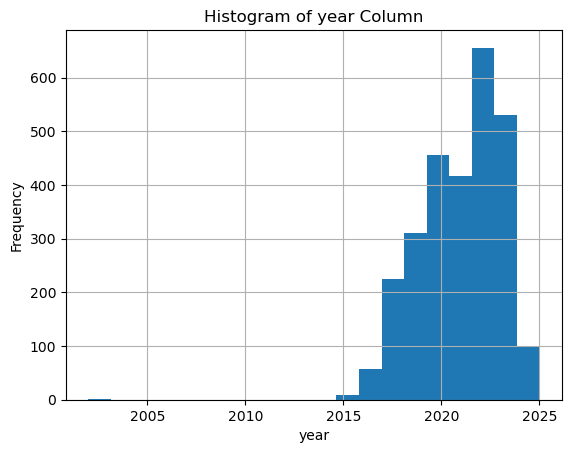

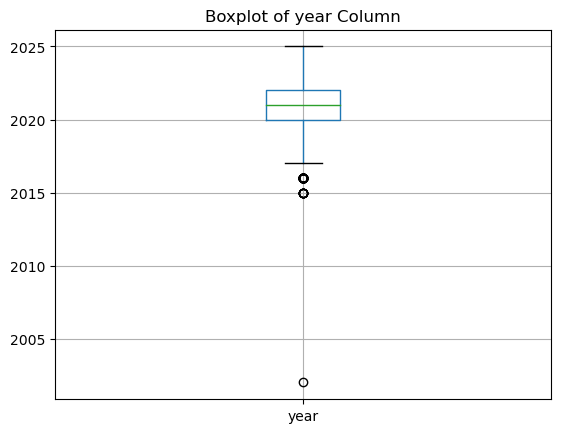

In [352]:
# Year column

# Histogram
df['year'].hist(bins=20)
plt.title('Histogram of year Column')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df.boxplot(column='year')
plt.title('Boxplot of year Column')
plt.show()


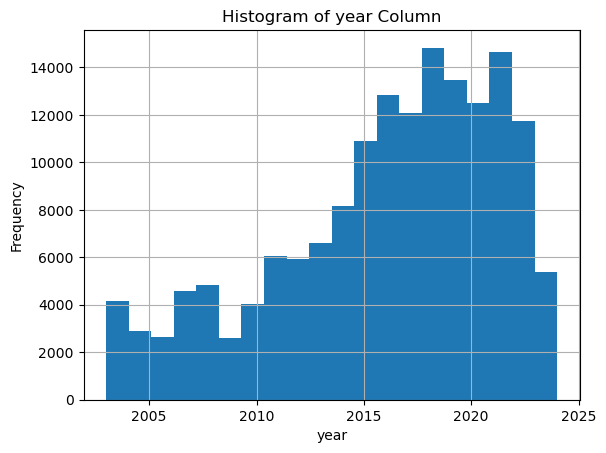

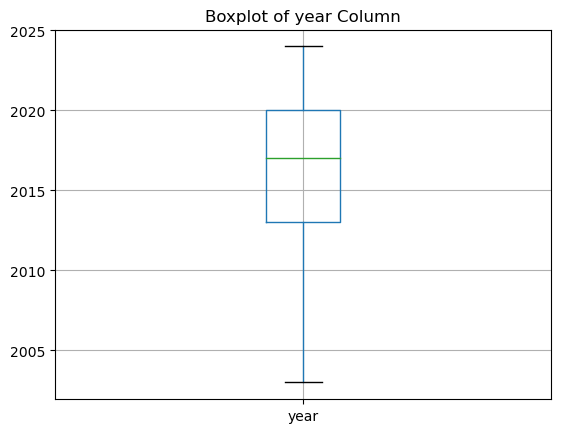

In [112]:
# Year column after filtering outliers for price

# Histogram
filtered_no_outliers_df['year'].hist(bins=20)
plt.title('Histogram of year Column')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

# Boxplot
filtered_no_outliers_df.boxplot(column='year')
plt.title('Boxplot of year Column')
plt.show()


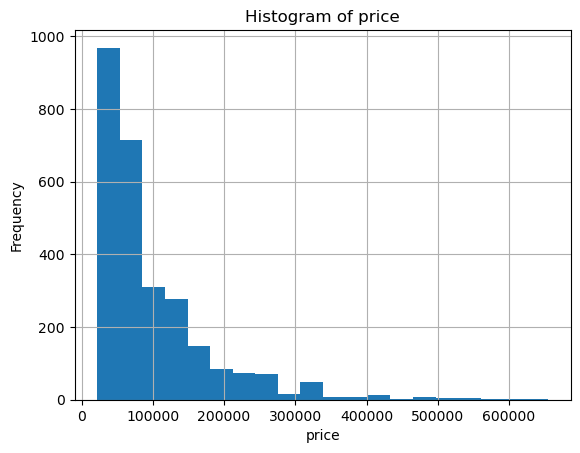

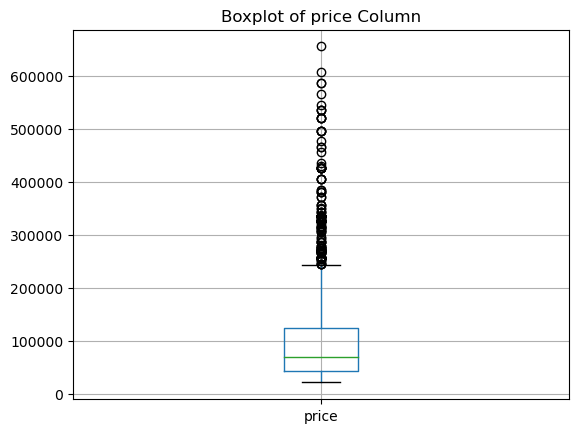

In [353]:
# Detected price outliers here
# Price column

# Histogram
df['price'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df.boxplot(column='price')
plt.title('Boxplot of price Column')
plt.show()


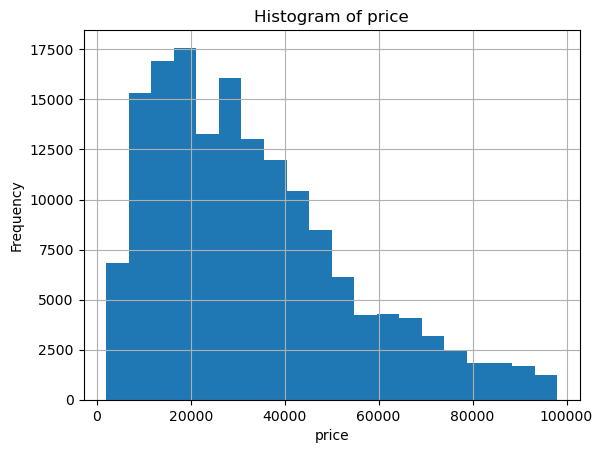

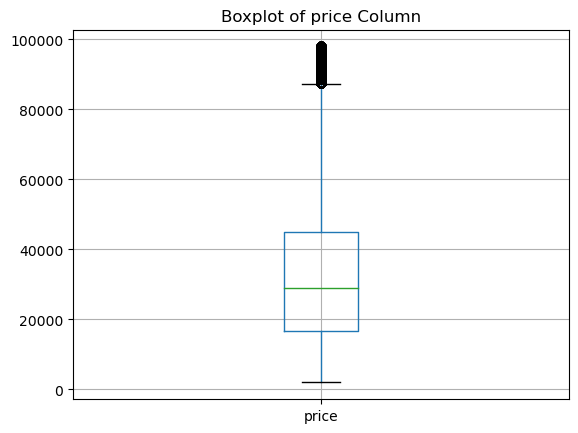

In [114]:
# Price column, post filtering out outliers

# Histogram
filtered_no_outliers_df['price'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# Boxplot
filtered_no_outliers_df.boxplot(column='price')
plt.title('Boxplot of price Column')
plt.show()


In [ ]:
# ['year', 'price', 'kilometer', 'engine_size', 'seat_number']

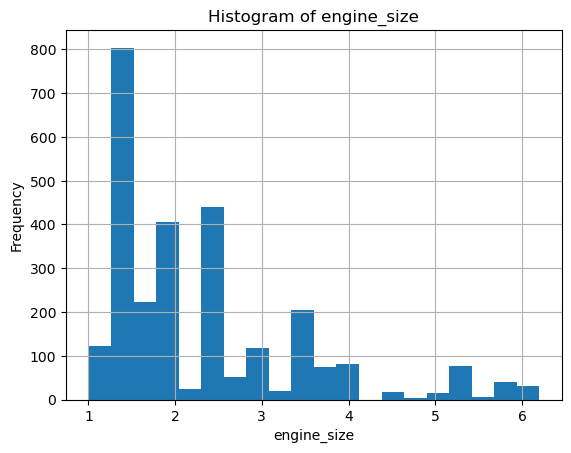

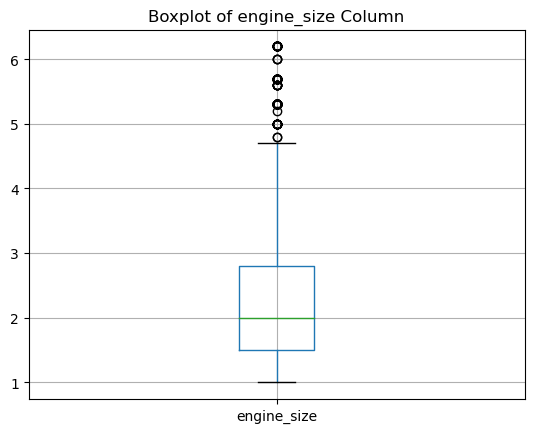

In [355]:
# Detected outliers here
# engine_size column

# Histogram
df['engine_size'].hist(bins=20)
plt.title('Histogram of engine_size')
plt.xlabel('engine_size')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df.boxplot(column='engine_size')
plt.title('Boxplot of engine_size Column')
plt.show()

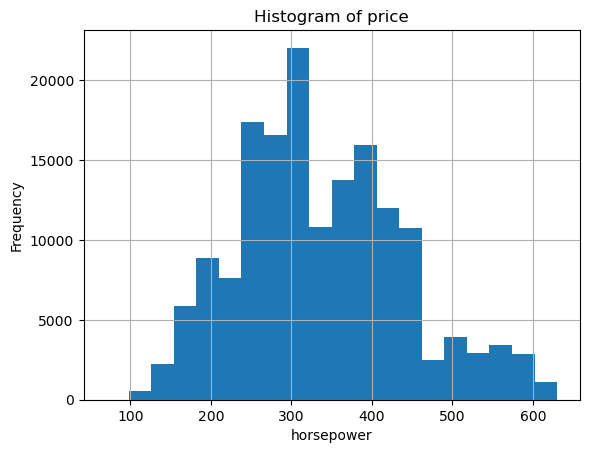

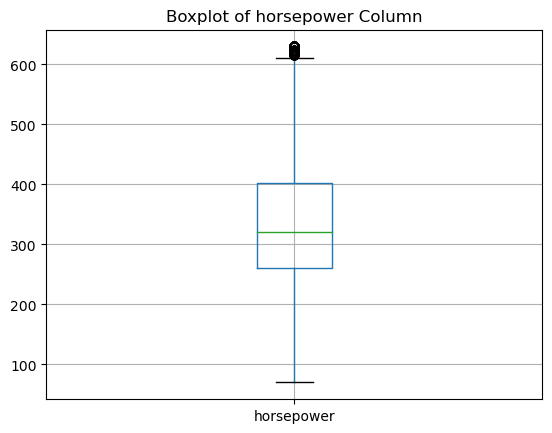

In [117]:
# Horsepower column, post filtering out outliers

# Histogram
filtered_no_outliers_df['horsepower'].hist(bins=20)
plt.title('Histogram of price')
plt.xlabel('horsepower')
plt.ylabel('Frequency')
plt.show()

# Boxplot
filtered_no_outliers_df.boxplot(column='horsepower')
plt.title('Boxplot of horsepower Column')
plt.show()

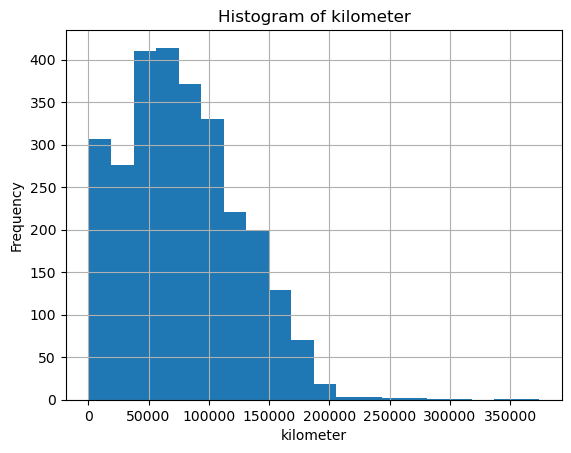

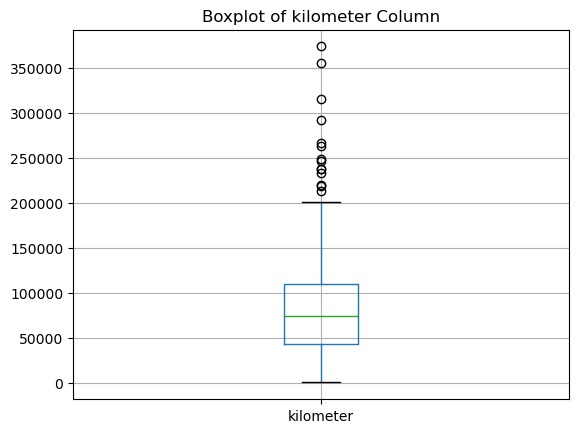

In [356]:
# Detecting outliers
# Mileage column, post filtering out outliers

# Histogram
df['kilometer'].hist(bins=20)
plt.title('Histogram of kilometer')
plt.xlabel('kilometer')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df.boxplot(column='kilometer')
plt.title('Boxplot of kilometer Column')
plt.show()

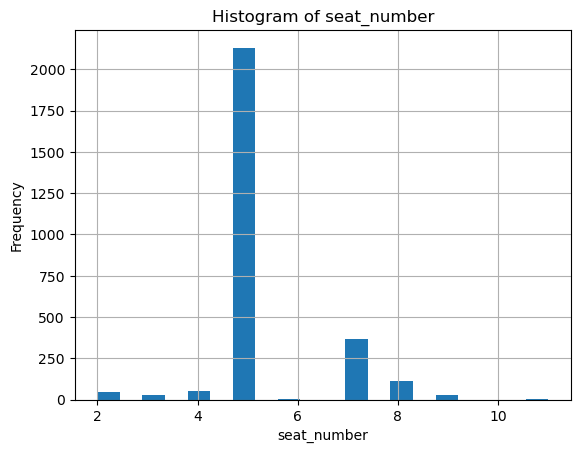

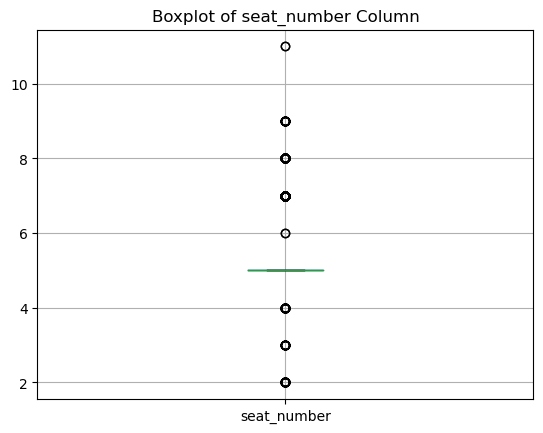

In [358]:
# seat_number column

# Histogram
df['seat_number'].hist(bins=20)
plt.title('Histogram of seat_number')
plt.xlabel('seat_number')
plt.ylabel('Frequency')
plt.show()

# Boxplot
df.boxplot(column='seat_number')
plt.title('Boxplot of seat_number Column')
plt.show()

# Outliers handling

In [360]:
df.shape

(2760, 15)

In [359]:
df_copy = df.copy()

In [363]:
# Dealing with price outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_copy['price'].quantile(0.25)
Q3 = df_copy['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_copy_price_filtered = df_copy[(df_copy['price'] >= lower_bound) & (df_copy['price'] <= upper_bound)]

In [364]:
df_copy_price_filtered.shape

(2578, 15)

In [365]:
# Dealing with year outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_copy_price_filtered['year'].quantile(0.25)
Q3 = df_copy_price_filtered['year'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_copy_price_filtered = df_copy_price_filtered[(df_copy_price_filtered['year'] >= lower_bound) & (df_copy_price_filtered['year'] <= upper_bound)]


In [366]:
df_copy_price_filtered.shape

(2516, 15)

In [369]:
# Dealing with kilometer outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_copy_price_filtered['kilometer'].quantile(0.25)
Q3 = df_copy_price_filtered['kilometer'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_copy_filtered = df_copy_price_filtered[(df_copy_price_filtered['kilometer'] >= lower_bound) & (df_copy_price_filtered['kilometer'] <= upper_bound)]

In [371]:
df_copy_filtered.shape

(2503, 15)

In [372]:
numerical_cols = df_copy_filtered.select_dtypes('number').columns.to_list()

In [375]:
categorical_cols = df_copy_filtered.select_dtypes('object').columns.to_list()

In [ ]:
numerical_cols.remove('id')

In [378]:
distribution_cols = numerical_cols

distribution_cols = distribution_cols + categorical_cols

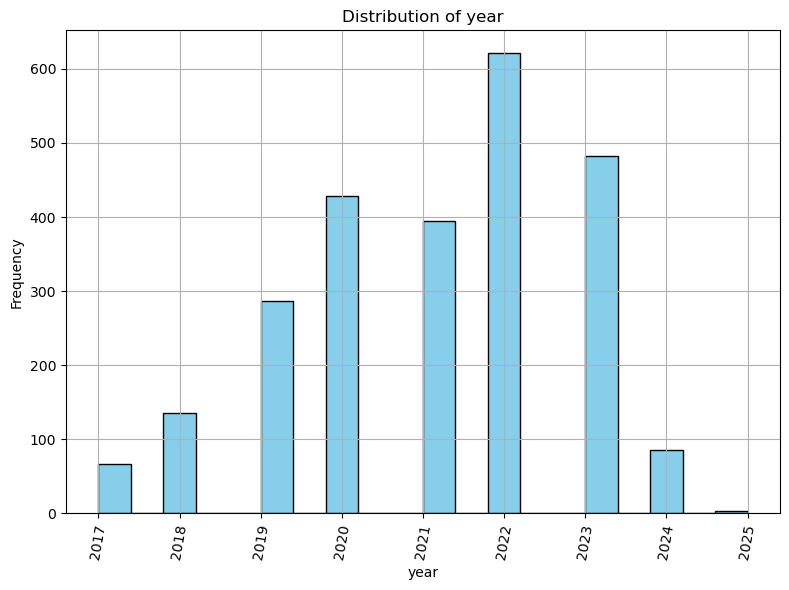

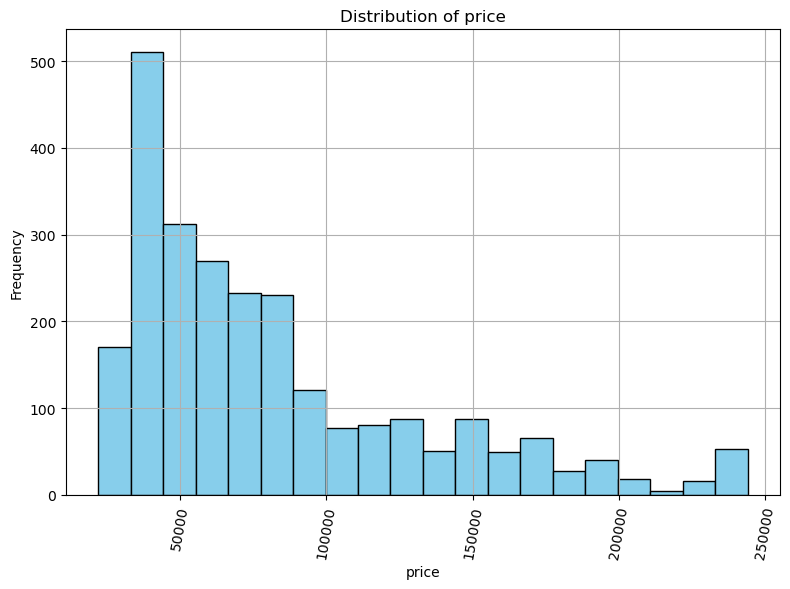

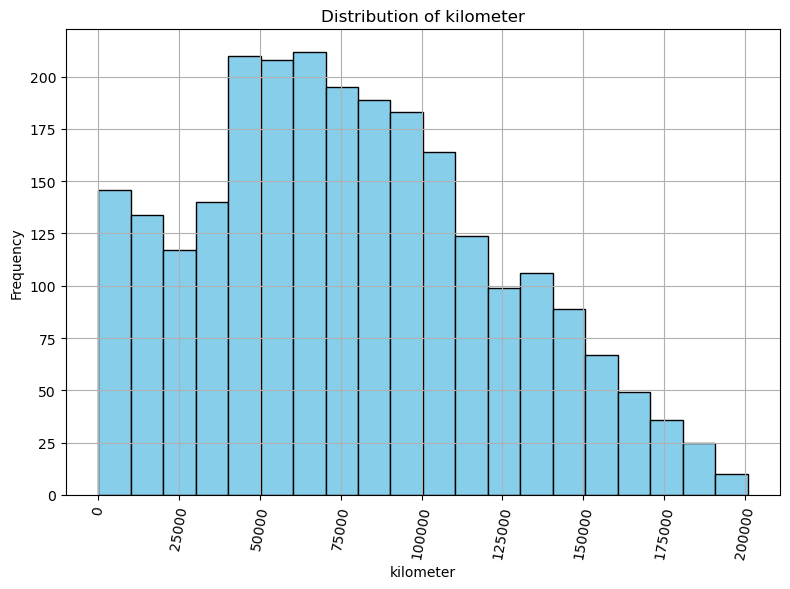

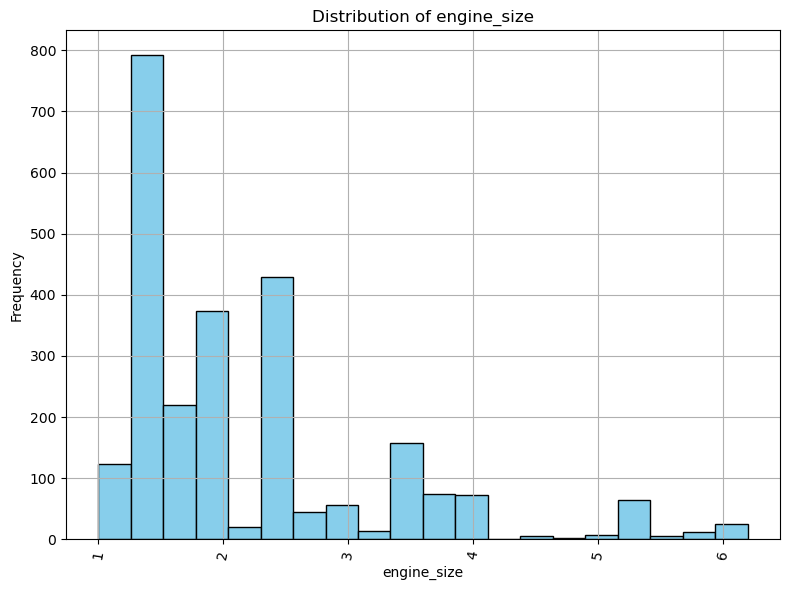

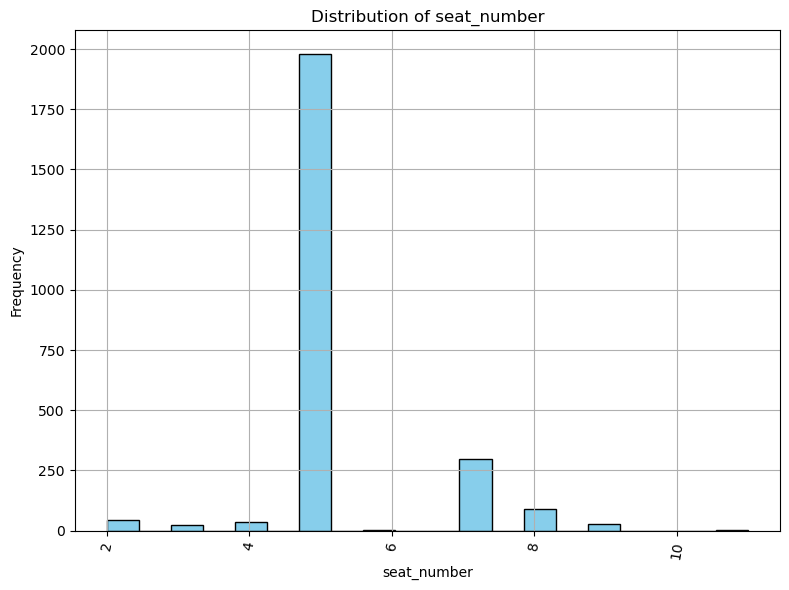

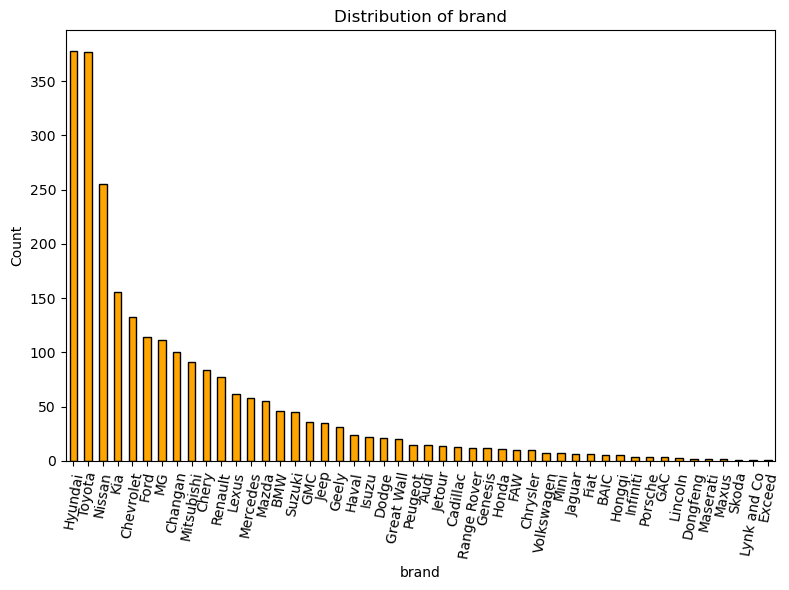

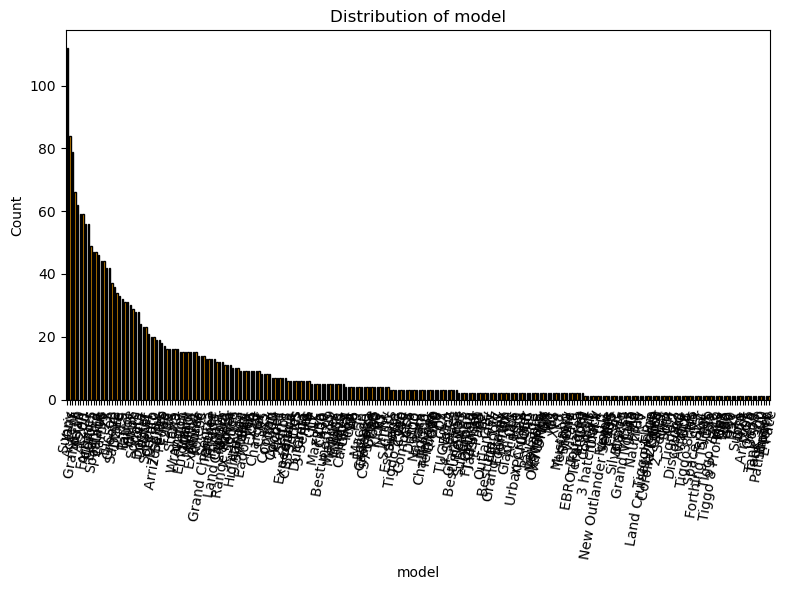

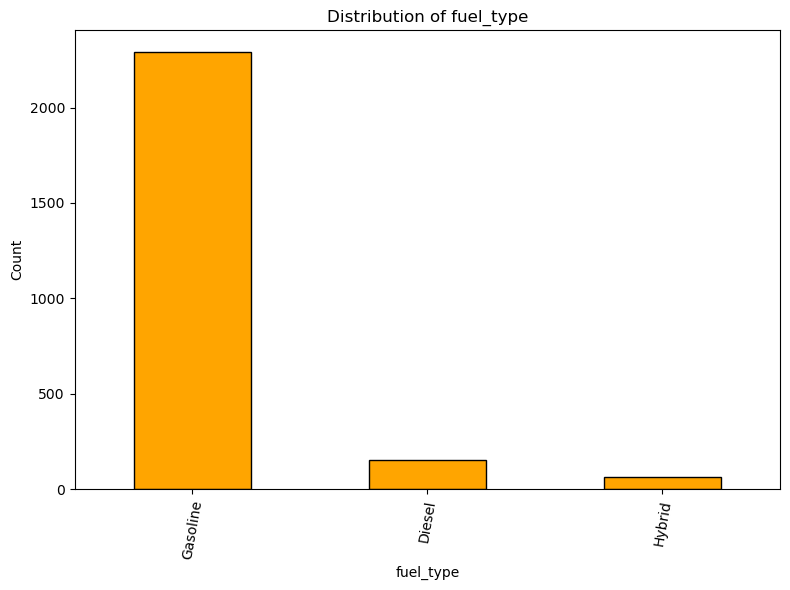

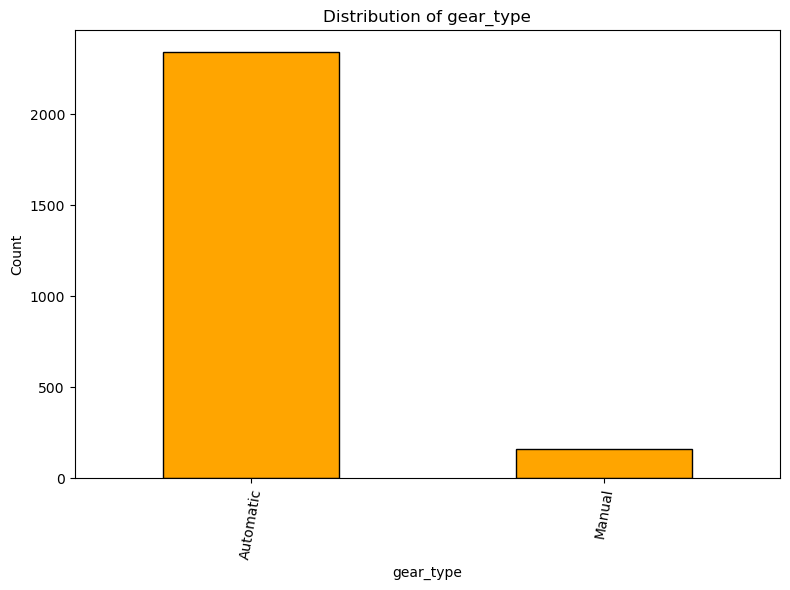

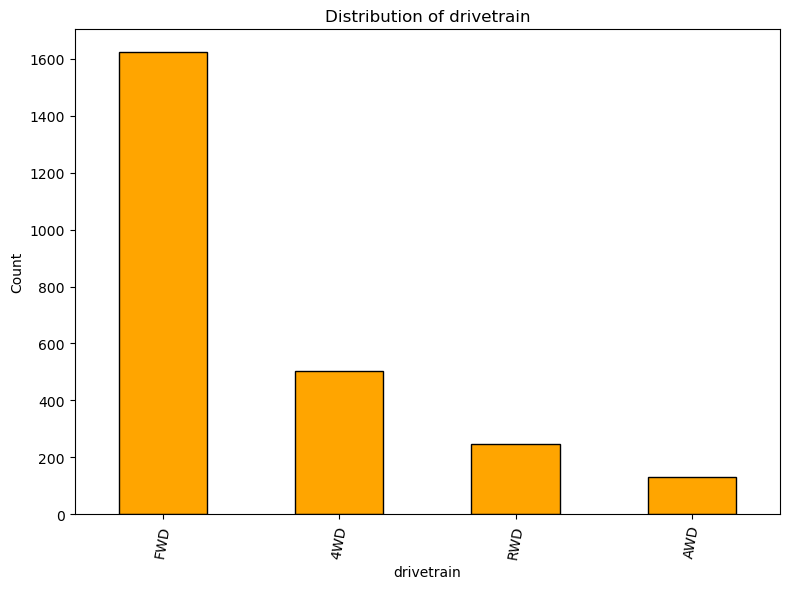

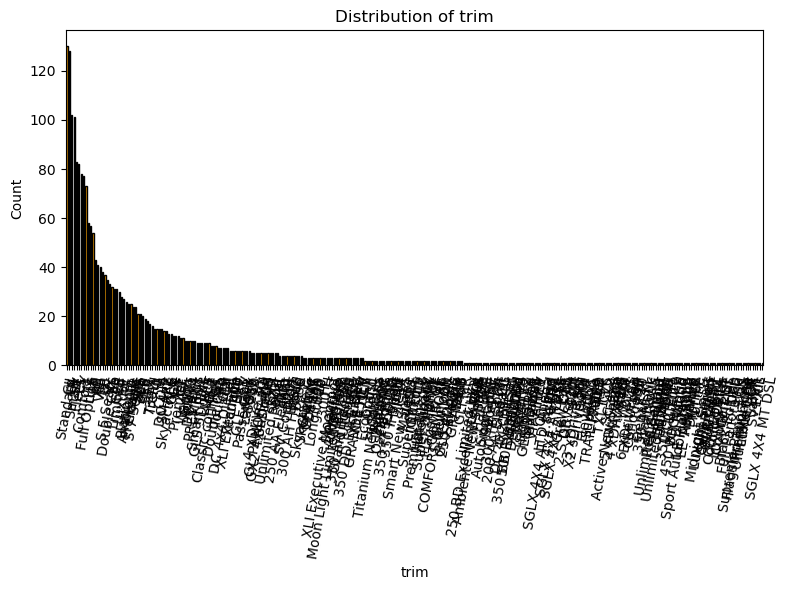

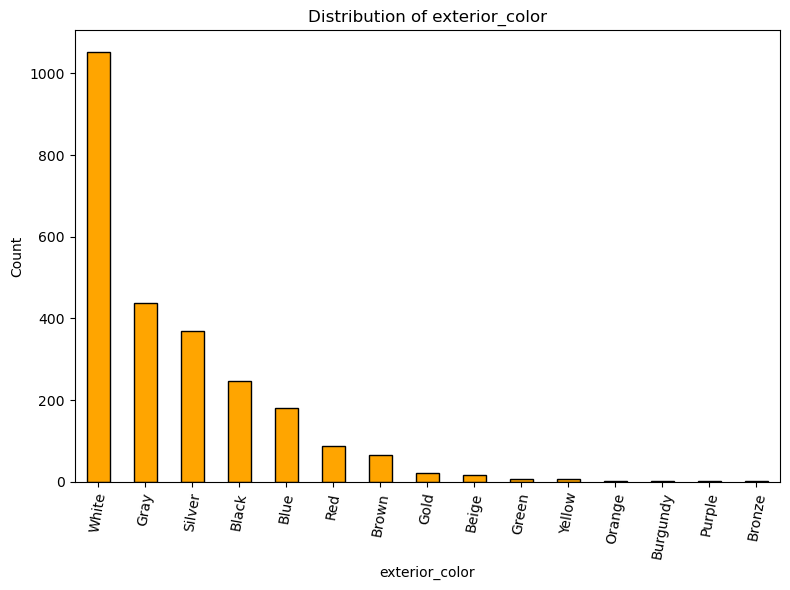

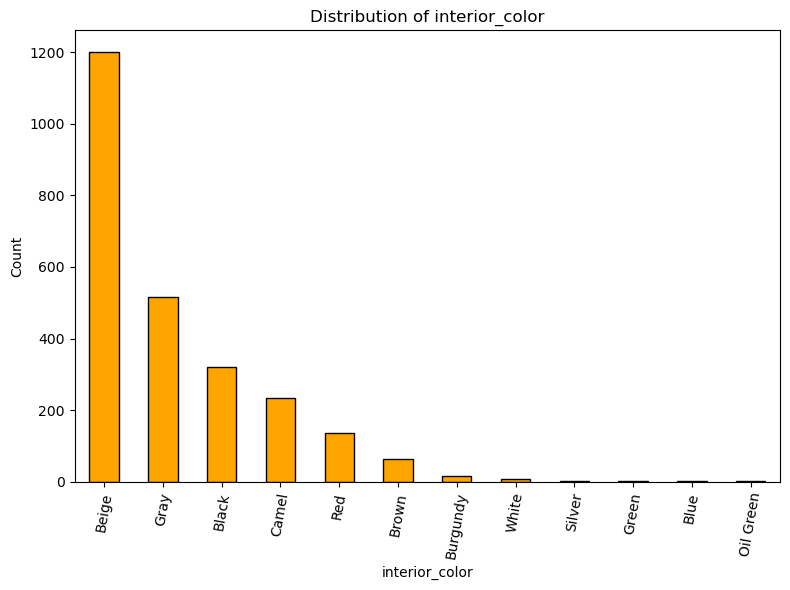

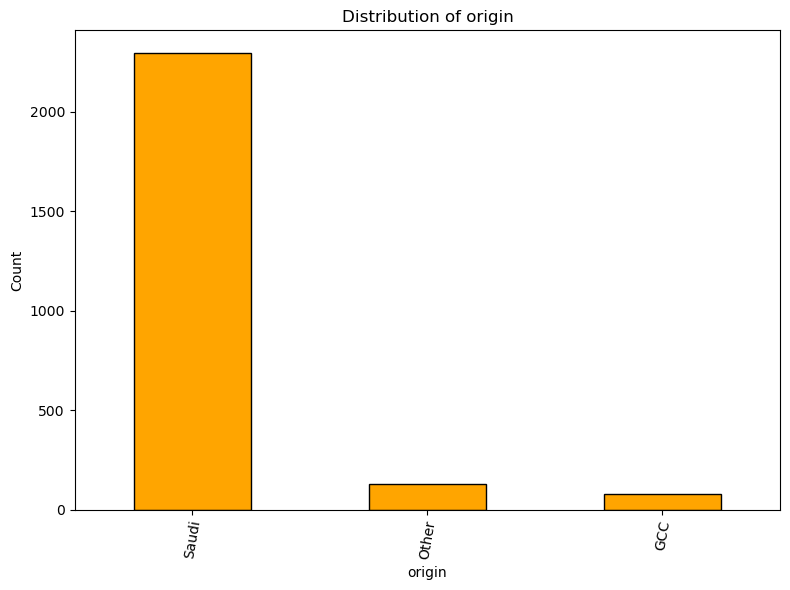

In [382]:
# Iterate through each column and plot the appropriate distribution
for column in distribution_cols:
    plt.figure(figsize=(8, 6))
    
    # Check if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(df_copy_filtered[column]):
        # Numerical column: plot a histogram
        df_copy_filtered[column].hist(bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Categorical column: plot a bar plot
        df_copy_filtered[column].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    
    plt.xticks(rotation=80)
    plt.tight_layout()
    plt.show()

## Univariate Analysis Conclusion

*Ordered by graph*

1. x

# Bi/Multivariate Analysis

/Users/salman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


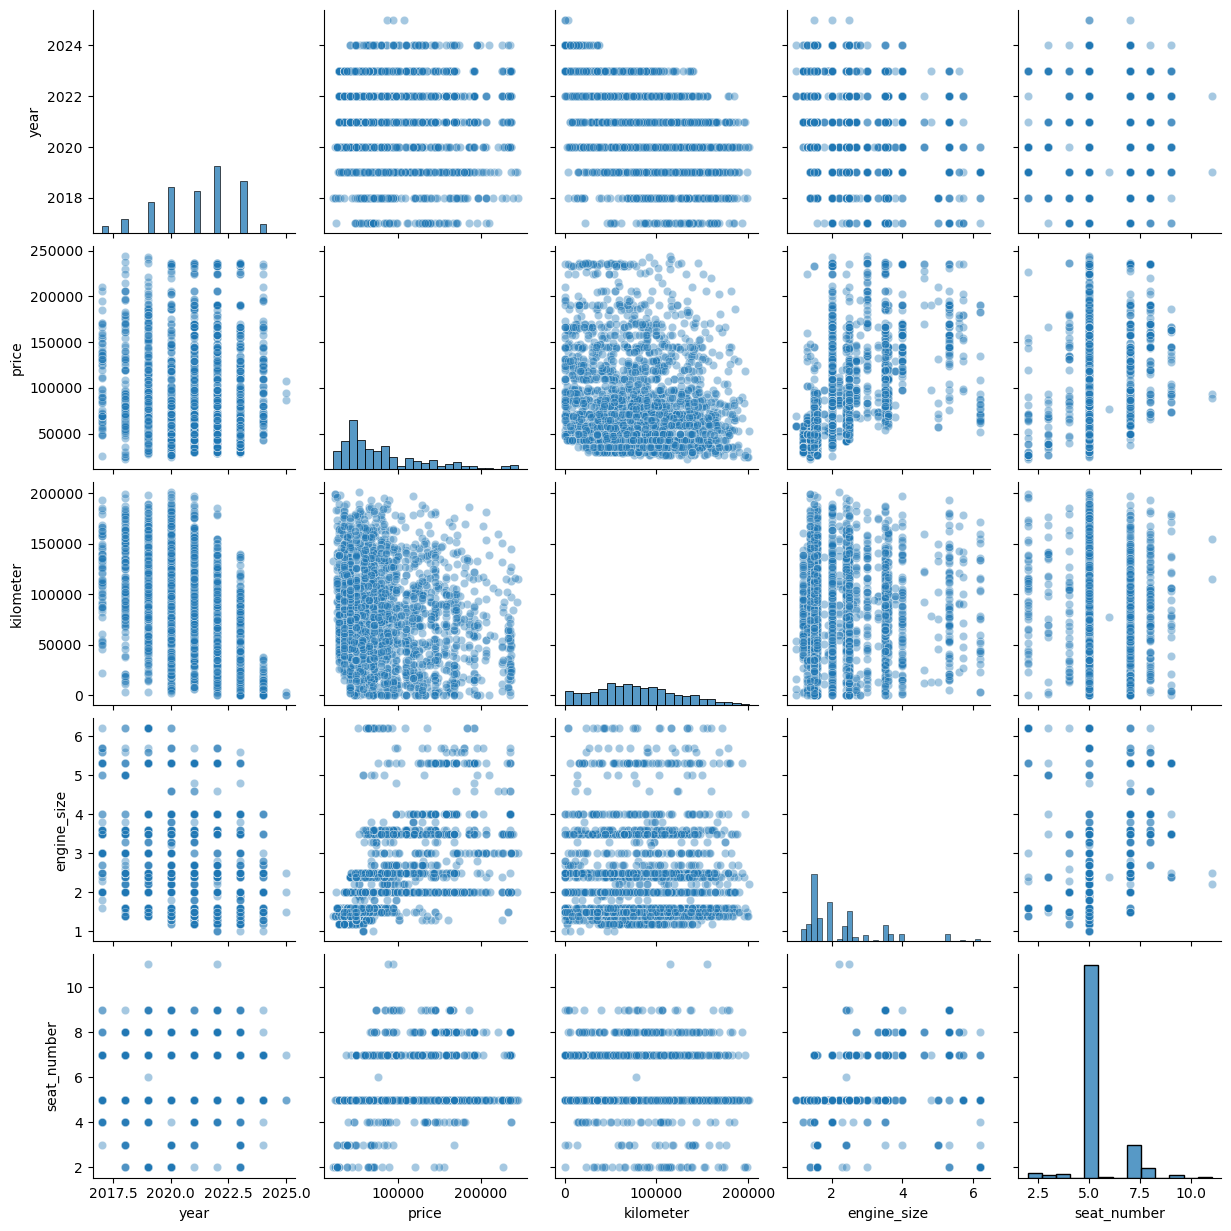

In [383]:
sns.pairplot(df_copy_filtered[numerical_cols], kind='scatter', plot_kws={'alpha': 0.4})

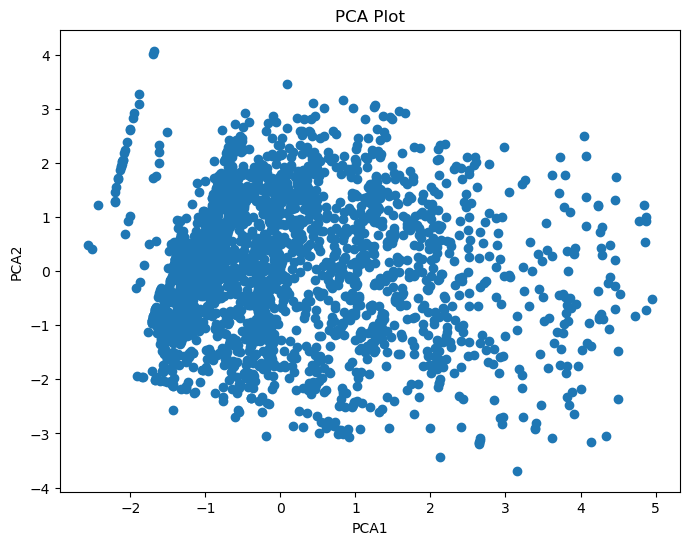

In [384]:


# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy_filtered[numerical_cols])  # Standardize numerical columns

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.title('PCA Plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [385]:
clustering_df = df_copy_filtered.copy()

/Users/salman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


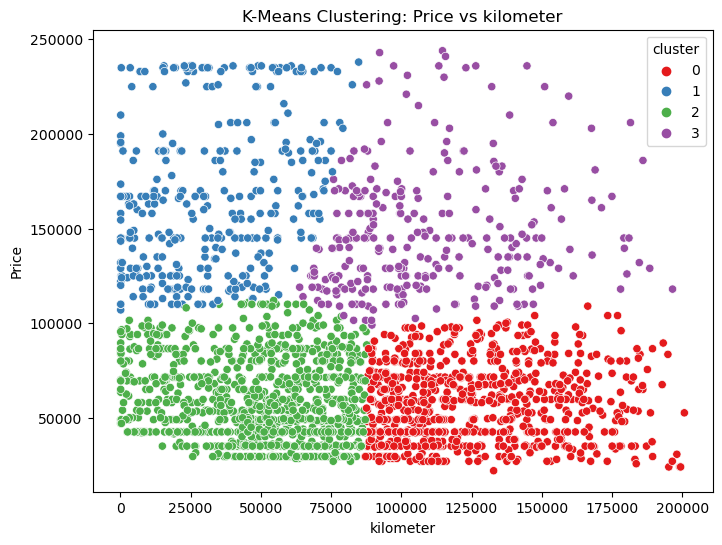

In [463]:

# Prepare numerical data
X = clustering_df[numerical_cols]  # Example: Use numerical columns

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=4)
clustering_df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometer', y='price', hue='cluster', data=clustering_df, palette='Set1')
plt.title('K-Means Clustering: Price vs kilometer')
plt.xlabel('kilometer')
plt.ylabel('Price')
plt.show()


/Users/salman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


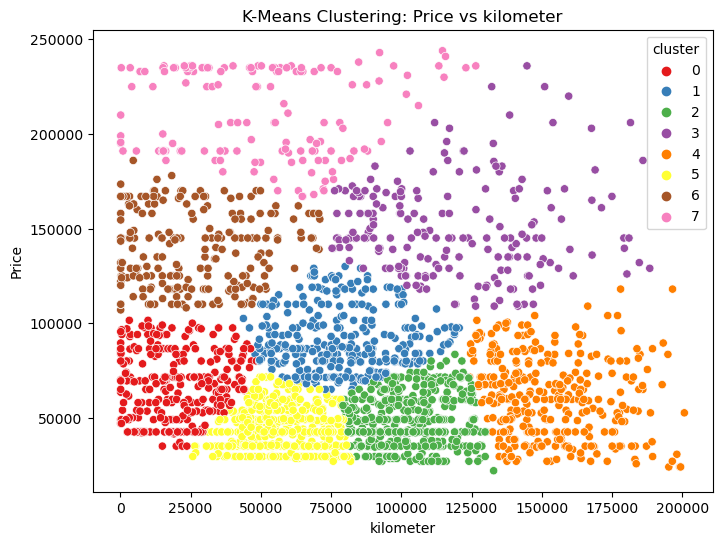

In [393]:
from sklearn.cluster import KMeans

# Prepare numerical data
X = clustering_df[numerical_cols]  # Example: Use numerical columns

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=8)
clustering_df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometer', y='price', hue='cluster', data=clustering_df, palette='Set1')
plt.title('K-Means Clustering: Price vs kilometer')
plt.xlabel('kilometer')
plt.ylabel('Price')
plt.show()


In [392]:
df_copy_filtered.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')

/Users/salman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


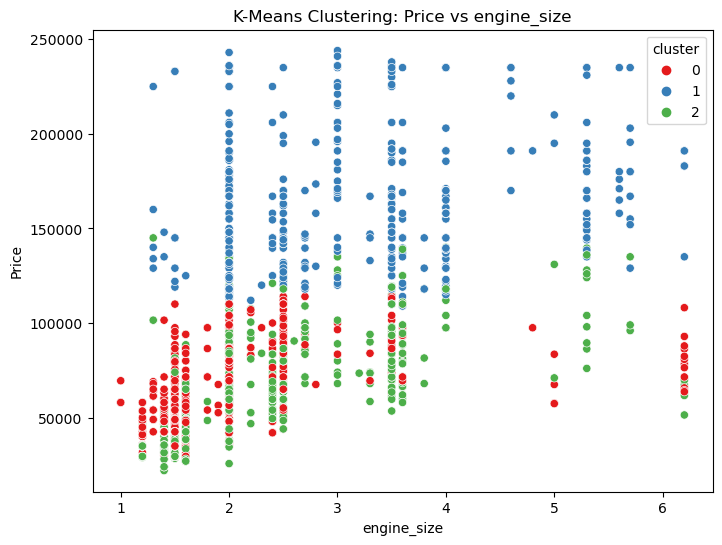

In [395]:
from sklearn.cluster import KMeans

# Prepare numerical data
X = clustering_df[numerical_cols]  # Example: Use numerical columns

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3)
clustering_df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_size', y='price', hue='cluster', data=clustering_df, palette='Set1')
plt.title('K-Means Clustering: Price vs engine_size')
plt.xlabel('engine_size')
plt.ylabel('Price')
plt.show()


### Correlations Section

In [418]:
numeric_df = df_copy_filtered.select_dtypes(include=['number'])
numeric_df.drop(columns='id', inplace=True)


In [419]:
numeric_df.head()

,year,price,kilometer,engine_size,seat_number
1,2019,78400,53941,6.2,5.0
2,2020,42500,82991,1.5,5.0
3,2021,47500,68431,1.2,5.0
4,2020,35000,177421,1.6,5.0
5,2023,59700,57063,1.5,7.0


In [420]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,year,price,kilometer,engine_size,seat_number
year,1.000000,-0.086405,-0.535018,-0.309042,0.035047
price,-0.086405,1.000000,-0.144244,0.610483,0.350803
kilometer,-0.535018,-0.144244,1.000000,0.091188,-0.033702
engine_size,-0.309042,0.610483,0.091188,1.000000,0.412892
seat_number,0.035047,0.350803,-0.033702,0.412892,1.000000


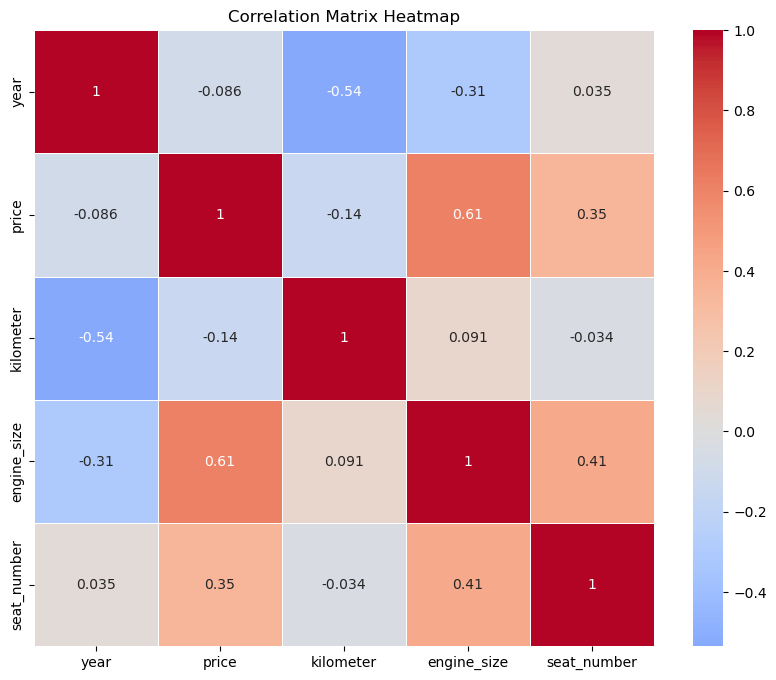

In [421]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


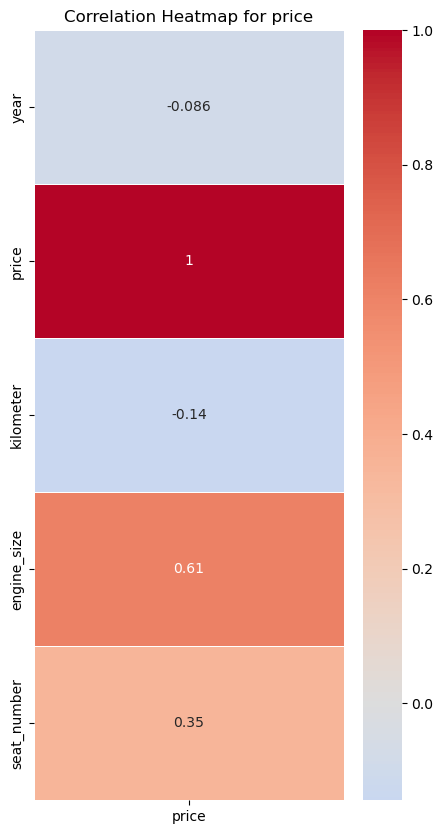

In [422]:


# Select the column you want to check the correlation for (e.g., 'price')
column_name = 'price'  

# Calculate the correlation of this column with other numerical columns
correlation_with_column =  correlation_matrix[['price']]  

# Plot the heatmap with correlation values
plt.figure(figsize=(5, 10))  
sns.heatmap(correlation_with_column, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, center=0)

plt.title(f'Correlation Heatmap for {column_name}')
plt.show()


In [402]:
df_copy_filtered.head()

,id,brand,model,year,price,kilometer,fuel_type,gear_type,engine_size,drivetrain,trim,exterior_color,interior_color,seat_number,origin
1,197716,Ford,F350,2019,78400,53941,Gasoline,Automatic,6.2,4WD,XL,White,Beige,5.0,Saudi
2,169575,MG,ZS,2020,42500,82991,Gasoline,Automatic,1.5,FWD,Standard,Black,Gray,5.0,Saudi
3,177219,FAW,Bestune T77,2021,47500,68431,Gasoline,Automatic,1.2,FWD,Standard,Yellow,Red,5.0,Saudi
4,192049,Nissan,Sentra,2020,35000,177421,Gasoline,Automatic,1.6,FWD,S,Gray,Beige,5.0,Saudi
5,211231,Jetour,X70,2023,59700,57063,Gasoline,Automatic,1.5,FWD,Luxury,Blue,Black,7.0,Saudi


In [403]:
len(df_copy_filtered['brand'].unique())

48

In [423]:
df_copy_filtered.shape

(2503, 15)

# Final Thoughts
x

In [404]:
# df_copy_filtered.to_csv('KSA_car_data_no_outliers.csv', index=False)

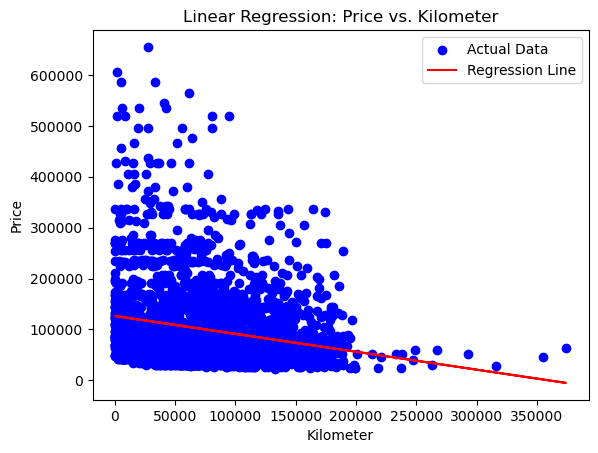

In [427]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the feature 'kilometer' and target 'price'
X = df_copy_filtered[['kilometer']]  # Feature matrix (independent variable)
y = df_copy_filtered['price']        # Target variable (dependent variable)

# Ensure 'kilometer' and 'price' are numeric and handle non-numeric values
df_cleaned = df[['kilometer', 'price']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or invalid numeric values
df_cleaned = df_cleaned.dropna()

# Redefine X and y after cleaning
X = df_cleaned[['kilometer']]  # Feature matrix (independent variable)
y = df_cleaned['price']        # Target variable (dependent variable)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Kilometer')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. Kilometer')

# Add legend
plt.legend()

# Display the plot
plt.show()


Mean Squared Error: 577943044.4533571
Mean Absolute Error: 18039.225398463062
R2 Score: 0.4338605919911185


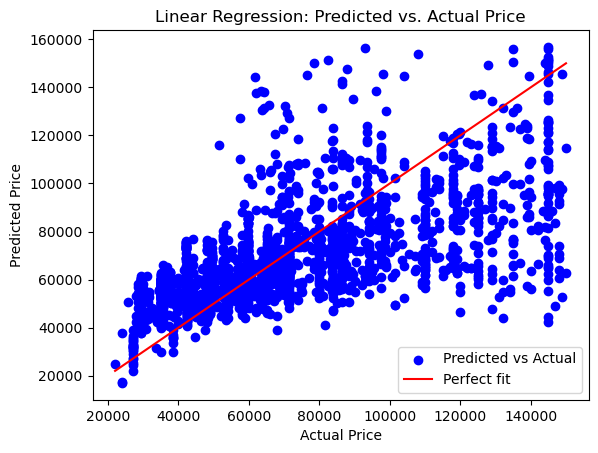

In [450]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features (independent variables)
X = df_copy_filtered2[['year', 'kilometer', 'engine_size', 'seat_number']]

# Target (dependent variable)
y = df_copy_filtered2['price']

# Ensure all features and the target are numeric and handle non-numeric values
df_cleaned = df_copy_filtered2[['year', 'kilometer', 'engine_size', 'seat_number', 'price']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or invalid numeric values
df_cleaned = df_cleaned.dropna()

# Redefine X and y after cleaning
X = df_cleaned[['year', 'kilometer', 'engine_size', 'seat_number']]  # Feature matrix (independent variables)
y = df_cleaned['price']  # Target variable (dependent variable)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y, y_pred)
print(f"R2 Score: {r2}")

# Plotting predicted vs actual prices
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Perfect fit')

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Predicted vs. Actual Price')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [444]:
df_copy_filtered2 = df_copy_filtered.copy()

In [446]:
df_copy_filtered2 = df_copy_filtered2[df_copy_filtered2['price'] <= 150000]

In [447]:
df_copy_filtered2.shape

(2212, 15)

Mean Squared Error: 1131452739.1986456
Mean Absolute Error: 27030.28216704289
R² Score: -0.210902571998429


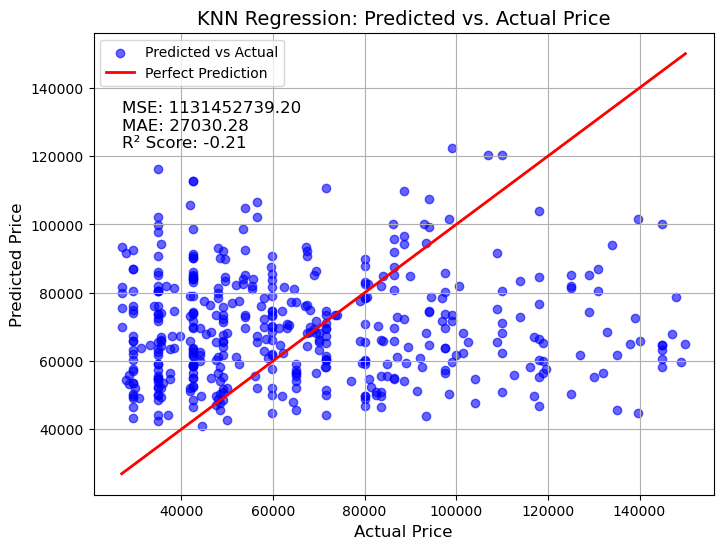

In [449]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Features (independent variables)
X = df_copy_filtered2[['year', 'kilometer', 'engine_size', 'seat_number']]

# Target (dependent variable)
y = df_copy_filtered2['price']

# Ensure all features and the target are numeric and handle non-numeric values
df_cleaned = df_copy_filtered2[['year', 'kilometer', 'engine_size', 'seat_number', 'price']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or invalid numeric values
df_cleaned = df_cleaned.dropna()

# Redefine X and y after cleaning
X = df_cleaned[['year', 'kilometer', 'engine_size', 'seat_number']]  # Feature matrix (independent variables)
y = df_cleaned['price']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor (with 5 neighbors by default)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the mean squared error (MSE), mean absolute error (MAE), and R² score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plotting predicted vs actual prices with enhancements
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the perfect fit line (diagonal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')

# Add grid for better readability
plt.grid(True)

# Add labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('KNN Regression: Predicted vs. Actual Price', fontsize=14)

# Add MAE, MSE, and R² score to the plot
plt.text(min(y_test), max(y_pred), f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR² Score: {r2:.2f}', fontsize=12, color='black')

# Add legend
plt.legend()

# Display the plot
plt.show()


Mean Squared Error: 348926937.9255079
Mean Absolute Error: 12846.292325056433
R² Score: 0.6265716525881743


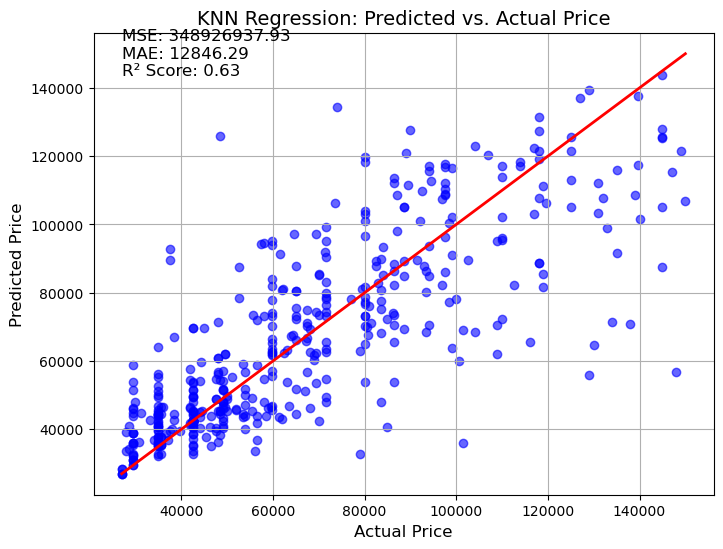

In [464]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_copy_filtered2 is your DataFrame
df = df_copy_filtered2

# Features (independent variables)
X = df[['year', 'kilometer', 'engine_size', 'seat_number']]

# Target (dependent variable)
y = df['price']

# Ensure all features and the target are numeric and handle non-numeric values
df_cleaned = df[['year', 'kilometer', 'engine_size', 'seat_number', 'price']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or invalid numeric values
df_cleaned = df_cleaned.dropna()

# Redefine X and y after cleaning
X = df_cleaned[['year', 'kilometer', 'engine_size', 'seat_number']]  # Feature matrix (independent variables)
y = df_cleaned['price']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler to scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN regressor (with 5 neighbors by default)
knn = KNeighborsRegressor(n_neighbors=4)

# Fit the KNN model using the scaled data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn.predict(X_test_scaled)

# Calculate the mean squared error (MSE), mean absolute error (MAE), and R² score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plotting predicted vs actual prices with enhancements
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the perfect fit line (diagonal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')

# Add grid for better readability
plt.grid(True)

# Add labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('KNN Regression: Predicted vs. Actual Price', fontsize=14)

# Add MAE, MSE, and R² score to the plot
plt.text(min(y_test), max(y_pred), f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR² Score: {r2:.2f}', fontsize=12, color='black')

# Add legend
# plt.legend()

# Display the plot
plt.show()


In [462]:
df_copy_filtered.columns

Index(['id', 'brand', 'model', 'year', 'price', 'kilometer', 'fuel_type', 'gear_type', 'engine_size', 'drivetrain', 'trim', 'exterior_color', 'interior_color', 'seat_number', 'origin'], dtype='object')